<a href="https://colab.research.google.com/github/kkrusere/Credit-Card-Fraud-Anomaly-Outlier-Detection/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <center> **Credit Card Fraud Detection** 
<center><em>The processes of determining an entry among entries that does not seem to belong. Credit Card Fraud Detection is a practical application of Anomaly/Outlier detection.In this case we are using the Anonymized Credit Card dataset from Kaggle, which has  transactions labeled as fraudulent or genuine to create an ML Fraud Detection model. Fraud Detection (Credit Card Fraud Detection) is a multi-billion-dollar industry, huge amounts of money and resources are employed to identifying fraud and anomalies in a lot industries more in particular in our situation the financial industry.</em></center>
<br>
<center><img src="https://github.com/kkrusere/Credit-Card-Fraud-Anomaly-Outlier-Detection/blob/main/Assets/CCFD.png?raw=1" width=600/></center>

***Project Contributors:*** Kuzi Rusere<br>
**MVP streamlit App URL:** N/A

Anomaly detection (also referred to as outlier detection and sometimes as novelty detection) is generally understood to be the identification of rare items, events, or observations that deviate significantly from the majority of the data and do not conform to a well-defined notion of normal behavior.  **Supervised anomaly detection** techniques require a data set that has been labeled as "normal" and "abnormal" and involves training a classifier. **Unsupervised anomaly detection** techniques assume the data is unlabelled and are by far the most commonly used due to their wider and relevant application. **Semi-supervised anomaly detection** techniques assume that some portion of the data is labeled. 

* An anomaly or outlier is a point or collection of points that are relatively distant from other points in a multi-dimensional space of features, an observation (or subset of observations) that appears to be inconsistent with the remainder of that set of data.

There are multiple methods/approaches to undertaking anomaly (or outlier) detection and these are sort-of classified into 3:

* Simple **Statistical** methods, such as the $Z$ test where you look at the how many standards deviation ($σ$) the data point is from the sample mean. The higher the number of $σ$ the more anomalous the data point is. Other simple statistical methods are using the **Modified $Z$-score** (a modified version of the $Z$ test using the median and Median Absolute Deviation (MAD), **Interquartile Range (IQR)** in conjunction with the **Boxplot** as it provides a better graphical representation of IQR together with additional information,  or the **Histogram** as it provides a graphical representation of the data distribution. In this project we are not going to be using these methods. 



* (General/Classical) **Machine Learning**, are the methodologies that we are going to focus in this project. The methods depending on the data can either be supervised, semi-supervised or unsupervised. Logistic Regression, K Nearest Neighbors, Support Vector Mechine (One-class Support Vector Machine), Decision Tree Classifier, LOF (Local outlier factor), Isolations Forest, DBSCAN, etc., are some examples of Machine Learning algorithms/methods used in anomaly/outlier


* **Deep Learning**, these are methods that are implemented on artificial neural networks for anomaly detection. While there are many approaches, the traditional machine learning (ML) techniques are suboptimal when it comes to high-dimensional data and sequence datasets, because they fail to capture the complex structures in the data. Common examples of deep learning methods/algorithms used in anomaly detection are **Autoencoder**, **Variational Autoencoders (VAE)**, **Generative Adversarial Networks (GAN)**, **Sequence-to-Sequence Models**, etc. 

***
**Project Objective:**

In this Project we are going to explore the different approaches to anomaly detection, in our case it's practical application as Credit Card Fraud Detection. We are going to use both machine learning methods and deep learning methods. To Optimize the performance of our classification machine learning algorithms, we are going to explore different ways of balancing the dataset and the different performance evaluations metrics other than accuracy (together with which metrics to prioritize and optimize the model for with regarts to the subject matter).

Machine Learning algorithms/methods to be used:

1. Naive Bayes Classifier
2. Logistic Regression
3. Decision Tree Classifier
4. Random Forests Classifier
5. Support Vector Machines Classifier
6. K-Nearest Neighbour Classifier
7. One-class Support Vector Machine
8. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)  
9. Isolations Forest
10. LOF (Local outlier factor)

Deep Learning algorithms/methods to be used:

1. Autoencoder
2. Variational Autoencoders (VAE)
3. Generative Adversarial Networks (GAN)
4. Sequence-to-Sequence Models



#### **Project Outline**:
1. [Data Collection](#scrollTo=Data_Collection)
2. [Exploratory Data Analytics](#scrollTo=Exploratory_Data_Analytics)
3. [Data Cleaning and Preparation](#scrollTo=Data_Cleaning_and_Preparation)
4. [Modeling, Evaluation and Discussion](#scrollTo=Modeling_Evaluation_and_Discussion)
5. [Conclusion](#scrollTo=Conclusion)
6. [References](#scrollTo=References)




### **Data Collection**

The data was collected from Kaggle the link is [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

<center><img src="https://github.com/kkrusere/Credit-Card-Fraud-Anomaly-Outlier-Detection/blob/main/Assets/kaggle.jpeg?raw=1" width=600/></center>

In [ ]:
# #we read the data from the AWS RDS
# from sqlalchemy import create_engine
# import mysql.connector as connection
# import config


# host= config.host
# user= config.user
# db_password = config.password
# port = config.port
# database = config.database


# engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

# try:
#     query = f"SELECT * FROM Credit_Card_Fraud_Detection_Data"
#     dataframe = pd.read_sql(query,engine)

# except Exception as e:
#     print(str(e))

In [ ]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/Public Data/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* **Time**: The time (in seconds) elapsed between the transaction and the very first transaction
* **V1 to V28**: Obtained from principle component analysis (PCA) transformation on original features that are not available due to confidentiality
* **Amount**: The amount of the transaction
* **Class**: The class of the transaction either it is fraudulent or not (Class = 0: Normal Transaction, Class = 1: Fraudulent Transaction)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### **Exploratory Data Analytics**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#lets take a look at the classes:
# Class 0: Normal Transaction, Class 1: Fraudulent Transaction
class_count_dict = dict(df['Class'].value_counts())
class_count_dict

{0: 284315, 1: 492}

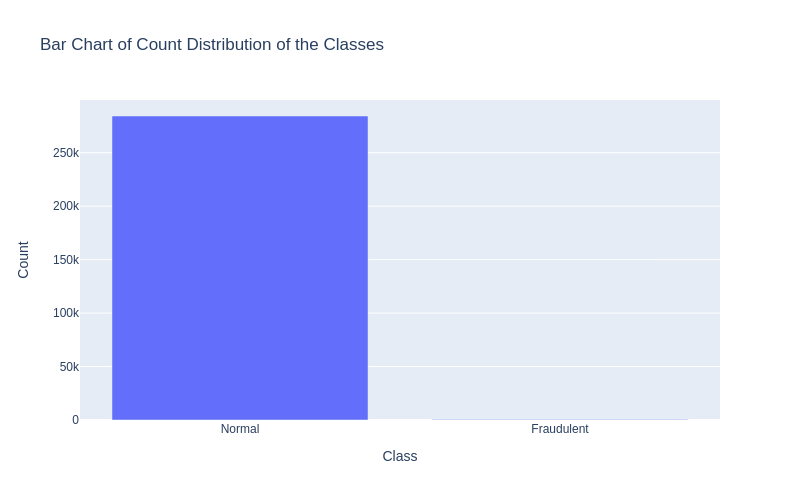

In [ ]:
class_dict = {0:'Normal',1:'Fraudulent'}
temp_df = pd.DataFrame(df['Class'].value_counts()).reset_index()
temp_df.columns = [temp_df.columns[1], 'Count']
temp_df['Class'] = temp_df['Class'].map(class_dict)

fig = px.bar(temp_df, x='Class', y='Count', title='Bar Chart of Count Distribution of the Classes')
fig.update_layout(height=500, width=800)
fig.show(renderer='png', height=500, width=800)
#fig.show()


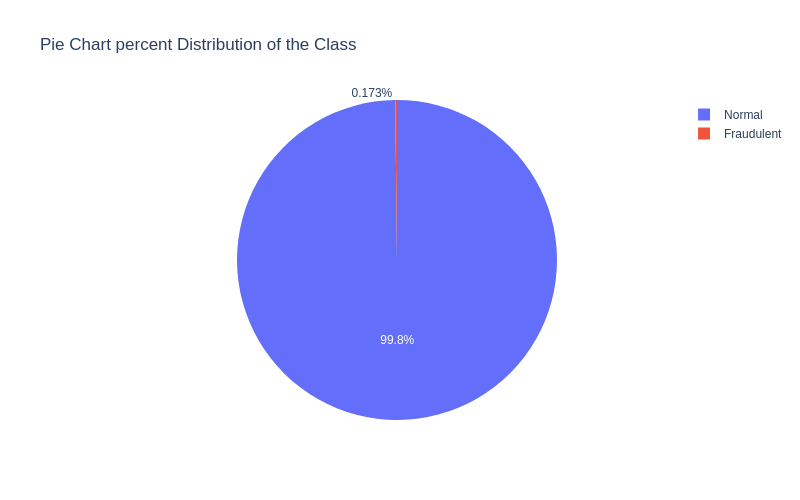

In [ ]:
fig = px.pie(temp_df, values='Count', names='Class', title='Pie Chart percent Distribution of the Class')
fig.update_layout(height=500, width=800)
fig.show(renderer='png', height=500, width=800)
#fig.show()

In [ ]:
temp_df = df[['Time','Amount','Class']].copy()
temp_df['Class'] = temp_df['Class'].map(class_dict)
temp_df.head()

,Time,Amount,Class
0,0.0,149.62,Normal
1,0.0,2.69,Normal
2,1.0,378.66,Normal
3,1.0,123.50,Normal
4,2.0,69.99,Normal


We want to convert the time into minutes, hours, and days to have a better picture of the time interval between the transactions. For this we are going to create 3 more columns to our data frame (minutes, hours, and days) and functions that we will use for the conversion.

In [ ]:
def sec2min(x):
  """
  The function takes in a second value and devide it by 60 to convert it into minutes
  Returns the minute value rounded to 2 decimal places
  """
  y = round(x/60, 2)

  return y

def sec2hours(x):
  """
  The function takes in a second value and devide it by 60 and again by 60 to convert it into hours
  Returns the hour value rounded to 2 decimal places
  """
  y = round((x/60)/60, 2)

  return y

def sec2days(x):
  """
  The function takes in a second value and devide it by 60, by 60 and by 24 to convert it into day
  Returns the day value rounded to 2 decimal places
  """
  y = round(((x/60)/60)/24, 2)

  return y

In [ ]:
temp_df['Minutes'] = temp_df['Time'].apply(sec2min)
temp_df['Hours'] = temp_df['Time'].apply(sec2hours)
temp_df['Days'] = temp_df['Time'].apply(sec2days)
temp_df = temp_df[['Time', 'Minutes', 'Hours', 'Days', 'Amount', 'Class']]
temp_df.columns = ['Seconds', 'Minutes', 'Hours', 'Days', 'Amount', 'Class']
temp_df.head()

,Seconds,Minutes,Hours,Days,Amount,Class
0,0.0,0.00,0.0,0.0,149.62,Normal
1,0.0,0.00,0.0,0.0,2.69,Normal
2,1.0,0.02,0.0,0.0,378.66,Normal
3,1.0,0.02,0.0,0.0,123.50,Normal
4,2.0,0.03,0.0,0.0,69.99,Normal


Lets look at the distribution of the amounts per class and the distribution of the time per class.

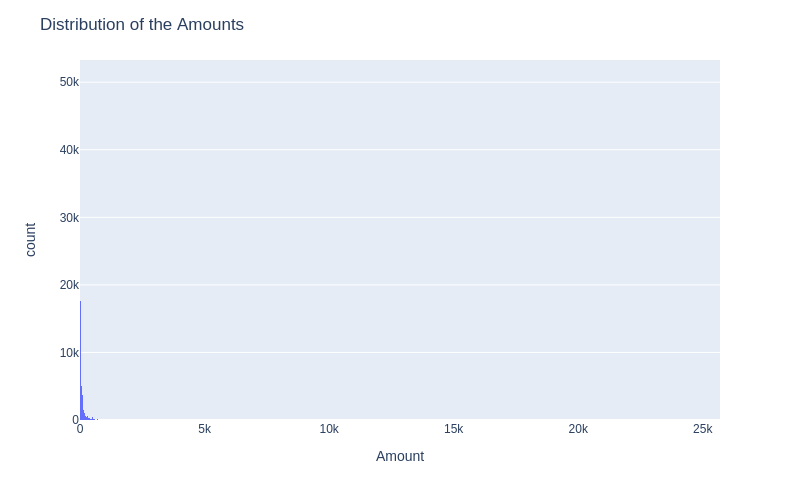

In [ ]:
#Distribution of the Amount 
fig = px.histogram(temp_df, x = 'Amount')
fig.update_layout(title= "Distribution of the Amounts")
#fig.show()
fig.show(renderer='png', height=500, width=800)

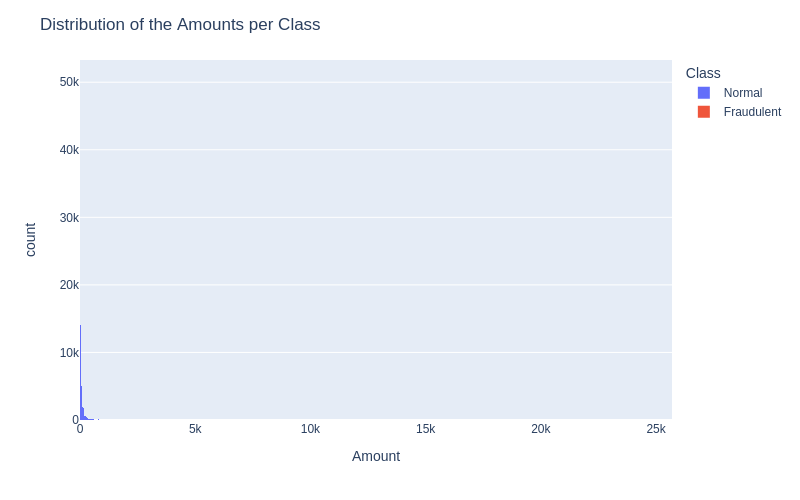

In [ ]:
#Distribution of the Amount 
fig = px.histogram(temp_df, x = 'Amount', color='Class')
fig.update_layout(title= "Distribution of the Amounts per Class")
#fig.show()
fig.show(renderer='png', height=500, width=800)

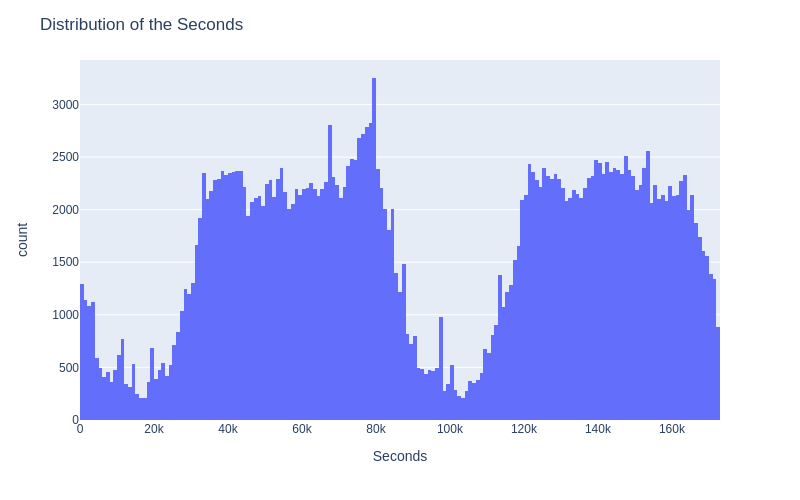

In [ ]:
#Distribution of Seconds per Class 
fig = px.histogram(temp_df, x = 'Seconds')
fig.update_layout(title= "Distribution of the Seconds")
#fig.show()
fig.show(renderer='png', height=500, width=800)

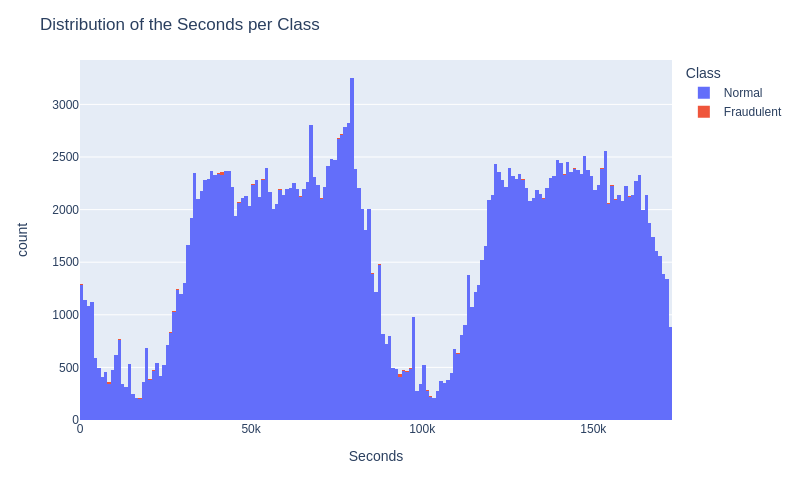

In [ ]:
fig = px.histogram(temp_df, x = 'Seconds', color='Class')
fig.update_layout(title= "Distribution of the Seconds per Class")
#fig.show()
fig.show(renderer='png', height=500, width=800)

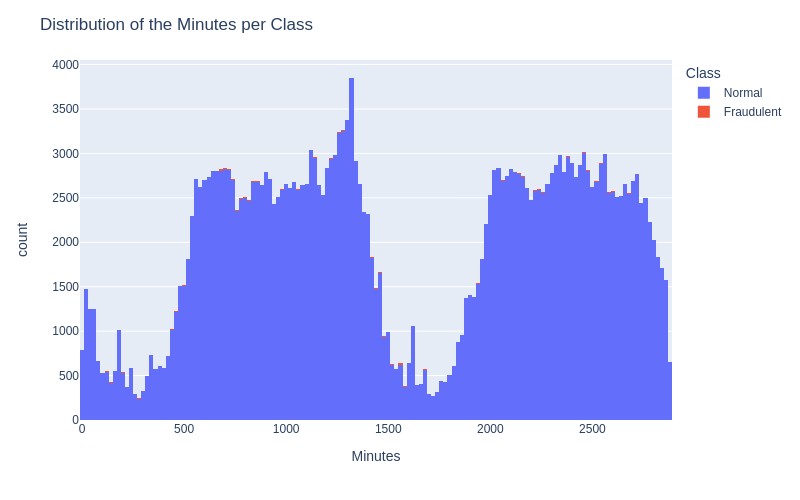

In [ ]:
fig = px.histogram(temp_df, x = 'Minutes', color='Class')
fig.update_layout(title= "Distribution of the Minutes per Class")
#fig.show()
fig.show(renderer='png', height=500, width=800)

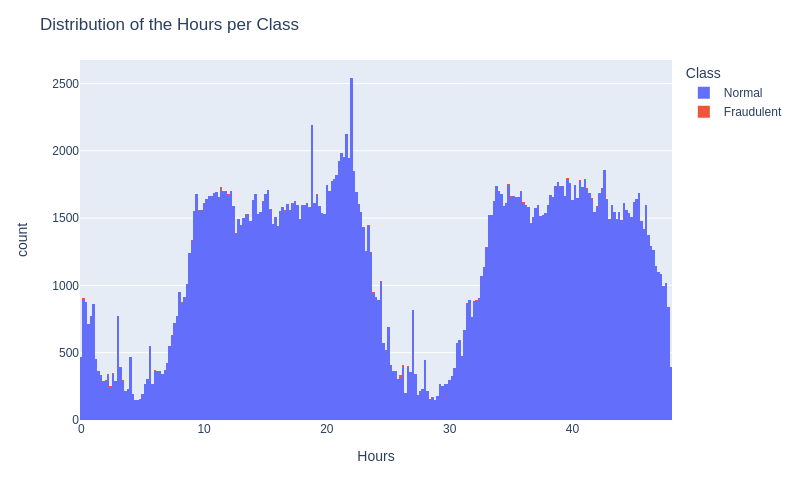

In [ ]:
fig = px.histogram(temp_df, x = 'Hours', color='Class')
fig.update_layout(title= "Distribution of the Hours per Class")
#fig.show()
fig.show(renderer='png', height=500, width=800)

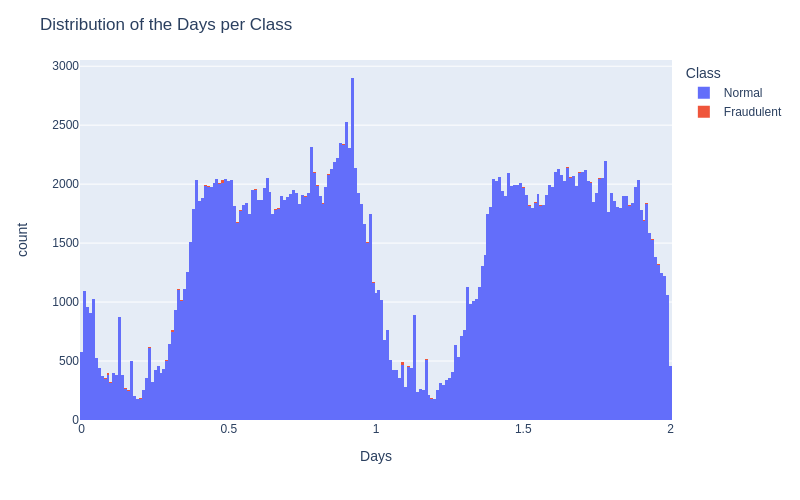

In [ ]:
fig = px.histogram(temp_df, x = 'Days', color='Class')
fig.update_layout(title= "Distribution of the Days per Class")
#fig.show()
fig.show(renderer='png', height=500, width=800)

In [ ]:
time_list = ['Seconds', 'Minutes', 'Hours', 'Days']

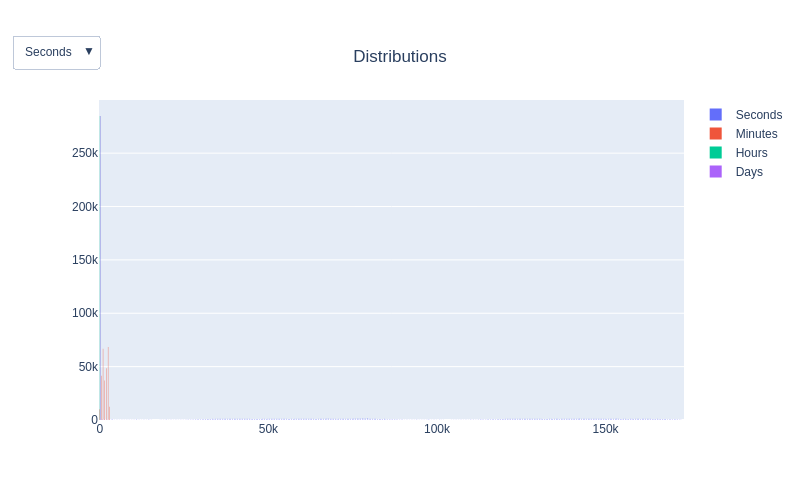

In [ ]:
#this is for creating the above histogram  charts using a the list of different time interval filters
fig = go.Figure()
for ele in time_list:
  temp_df
  fig.add_trace(go.Histogram(x = temp_df[ele],name = ele,  visible = True)
  )
buttons = []

for i, ele in enumerate(time_list):
    args = [False] * len(time_list)
    args[i] = True
    
    button = dict(label = ele,
                  method = "update",
                  args=[{"visible": args}])
    
    buttons.append(button)
    
fig.update_layout(
    updatemenus=[dict(
                    active=0,
                    type="dropdown",
                    buttons=buttons,
                    x = 0,
                    y = 1.1,
                    xanchor = 'right',
                    yanchor = 'bottom'
                )], 
    autosize=False,
    width=1000,
    height=800
)
fig.update_layout(
    title={
        'text': f"Distributions",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show(renderer='png', height=500, width=800)
#fig.show()


Lets look at scatter plot of the transaction amount per the time the transation was made.

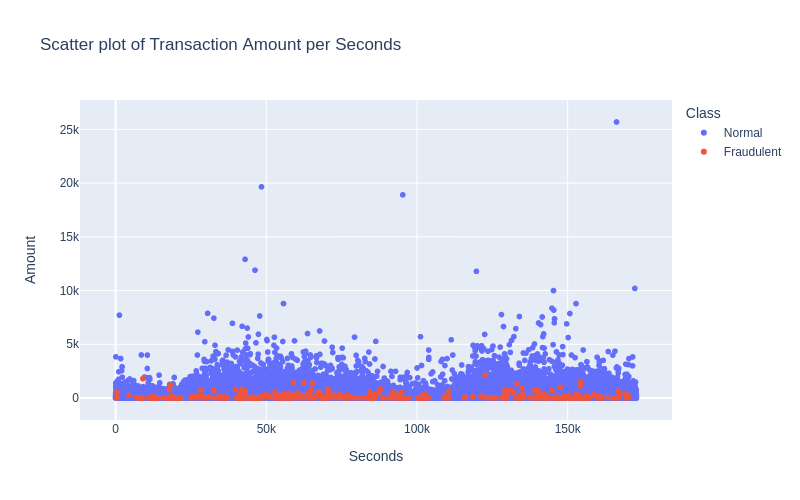

In [ ]:
fig = px.scatter(temp_df, x='Seconds', y='Amount', color='Class', title="Scatter plot of Transaction Amount per Seconds")
#fig.show()
fig.show(renderer='png', height=500, width=800)

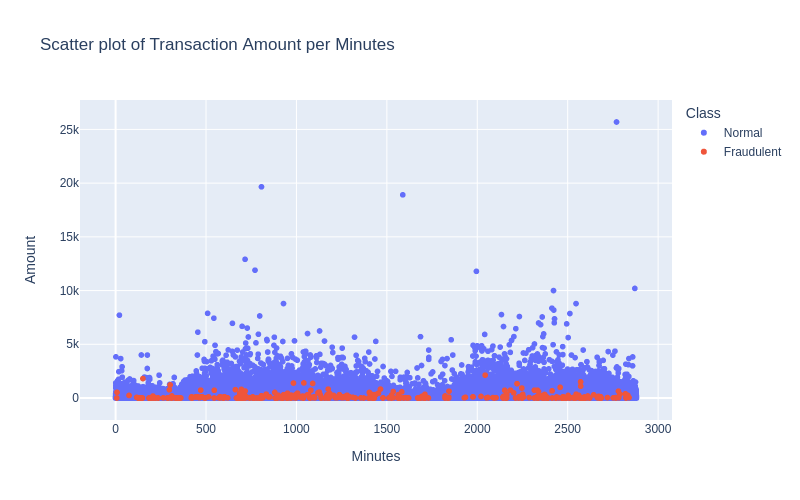

In [ ]:
fig = px.scatter(temp_df, x='Minutes', y='Amount', color='Class', title="Scatter plot of Transaction Amount per Minutes")
#fig.show()
fig.show(renderer='png', height=500, width=800)

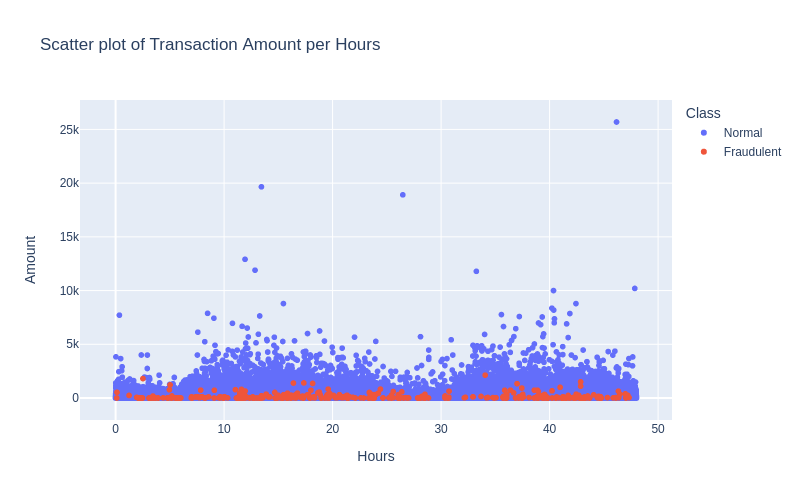

In [ ]:
fig = px.scatter(temp_df, x='Hours', y='Amount', color='Class', title="Scatter plot of Transaction Amount per Hours")
#fig.show()
fig.show(renderer='png', height=500, width=800)

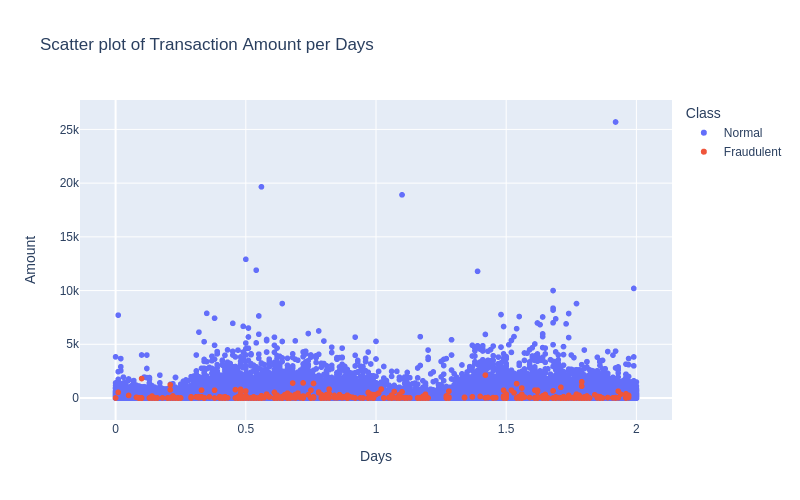

In [ ]:
fig = px.scatter(temp_df, x='Days', y='Amount', color='Class', title="Scatter plot of Transaction Amount per Days")
#fig.show()
fig.show(renderer='png', height=500, width=800)

Let's have a quick look at the BoxPlot of the different features in our dataset

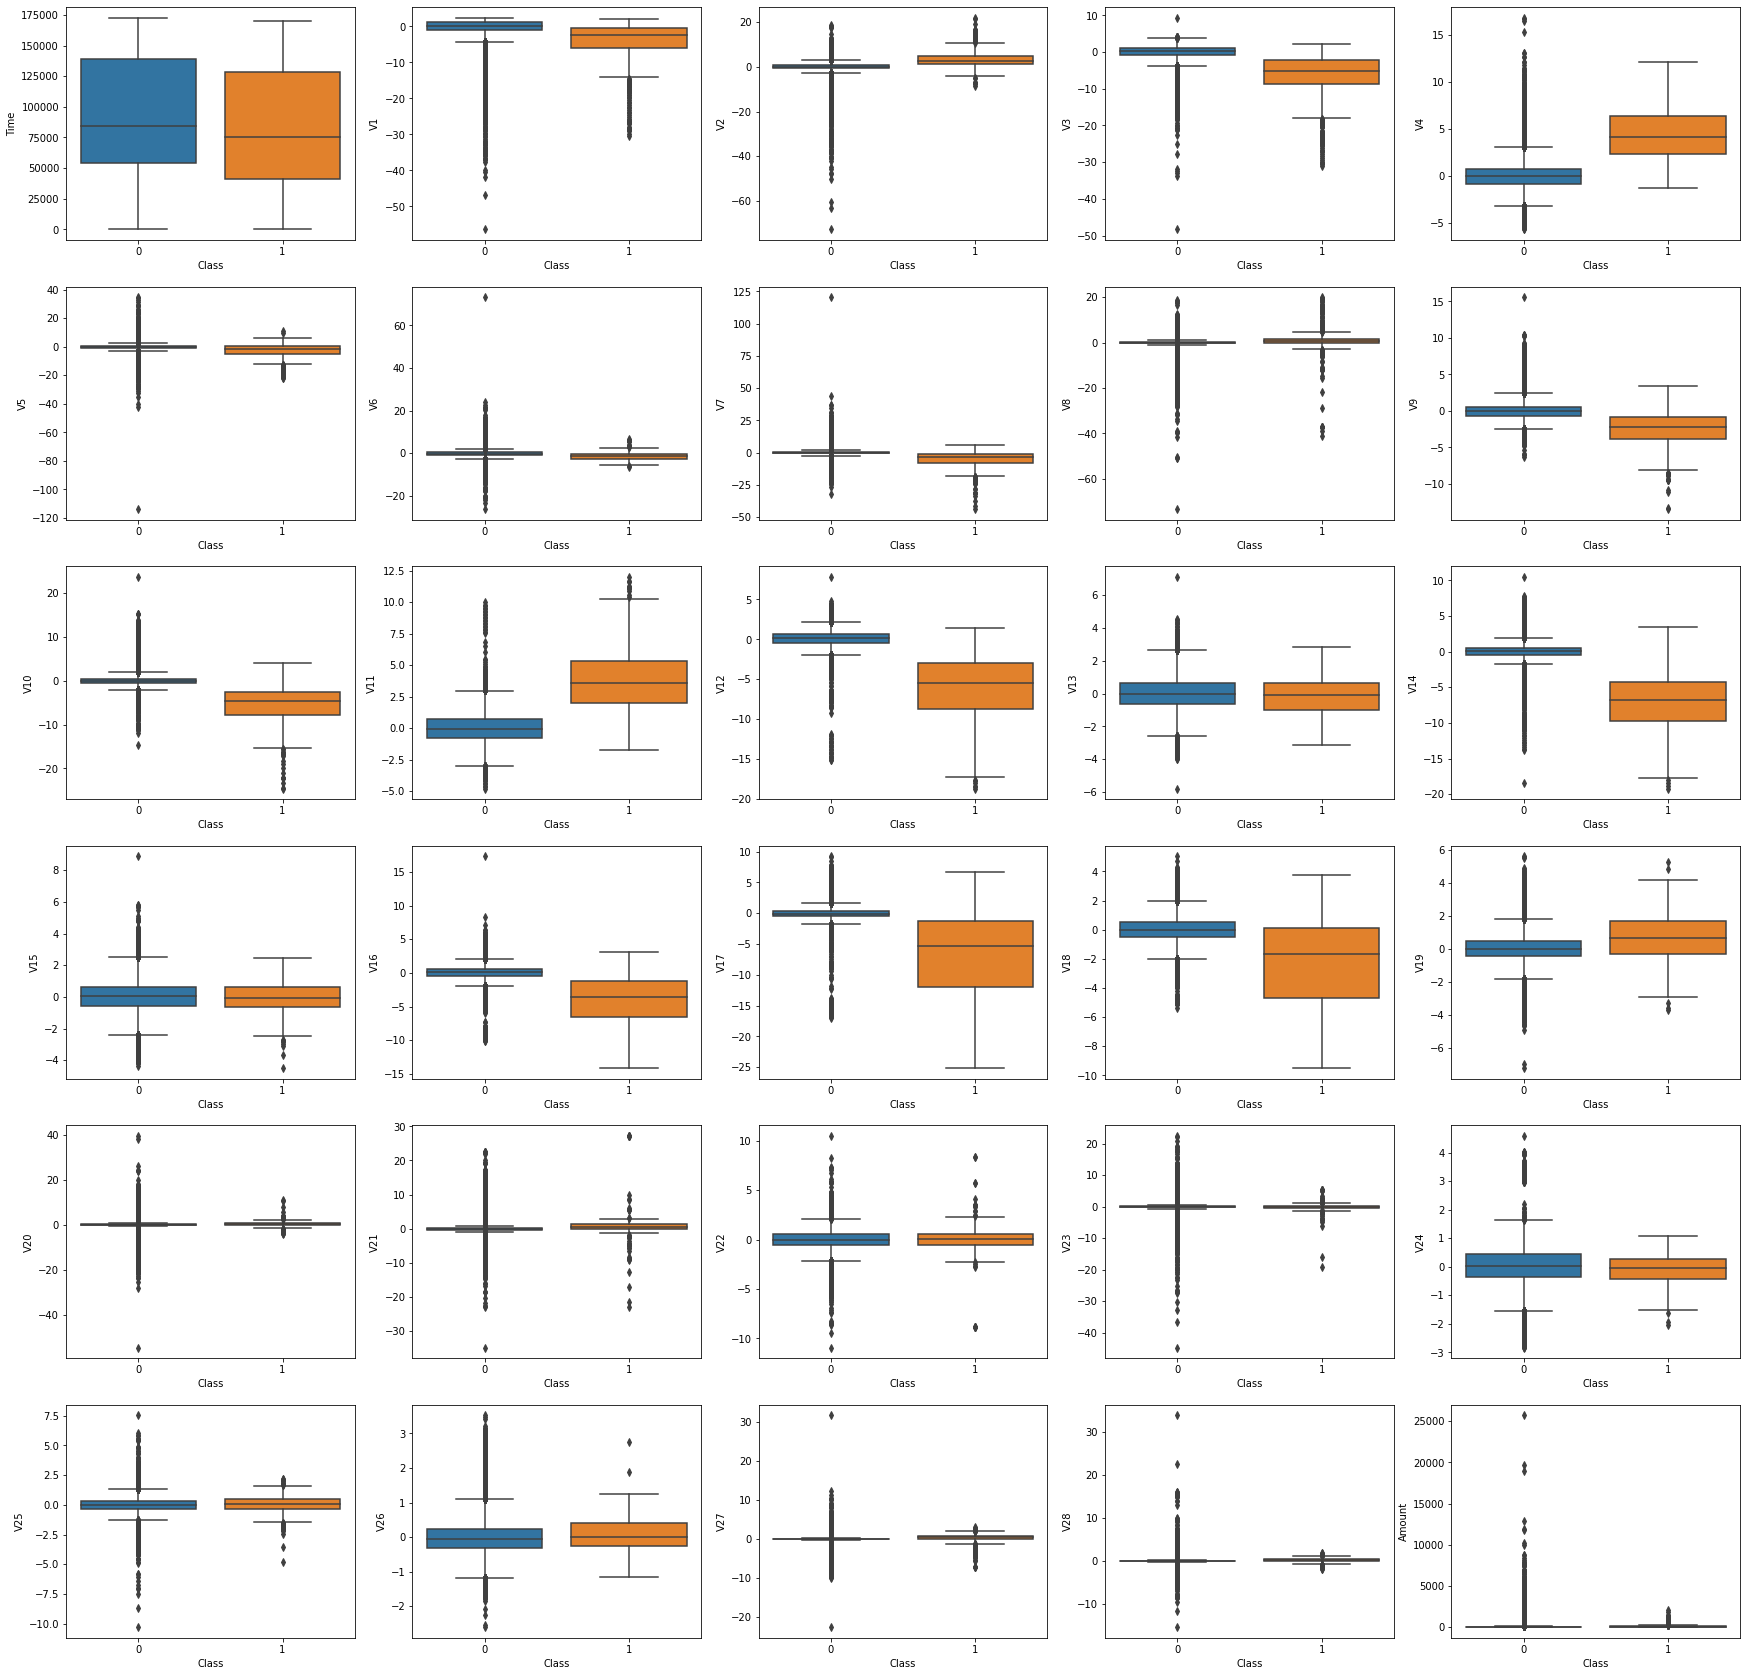

In [ ]:
column_list = list(df.columns[:-1])

fig = plt.figure(figsize=(30,30))
for i in range(len(column_list)):
  column = column_list[i]
  sub = fig.add_subplot(6,5,i + 1)
  sns.boxplot(x='Class', y=column, data=df)

In [ ]:
df.loc[:, 'Time':'V10']

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074
...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

From the above, should note that there is nothing in the Visualization that really seperate the fraudulent transactions from the normal transaction with respect to the Time the transation was made and the amount. So, these two features alone cannot be used to distinguish normal transations from fraudulent ones. That said lets get into the data cleaning and preparation.

### **Data Cleaning and Preparation**
Here, we are going to 'Clean' and Prepare the data for modeling with the various Machine Learning algorithms that we are going to explore in this project. From the above EDA, it shows that the data does not have any missing values. However, the data is imbalanced (there is an unequal distribution of classes in the dataset), this is a typical scenario in anomaly/outlier or novelty detection project/datasets. The normal/positive class is the majority class with for every 578 transactions 1 of them is Fraudulent. For Classification Algorithms, like the Logistic Regression, this is an issue as most of the predictions from models created from such algorithm will correspond to the majority class (normal transactions) and treat the minority class (fraudulent transactions) features as noise in the data and ignore them. These models are highly accurate (for our dataset they will be about 98% accurate), but biased on the side of the majority class. Hence, we need to explore differenty way of dealing with Imbalanced Data.
Balancing the data:

There are several ways of working with an imbalanced dataset such as:
1. [ReSampling](#scrollTo=ReSampling)
> Resampling also known as Random Resampling, is the recreation of a new transformed version of the training dataset that has a balanced distribution of the classes. There are 2 main types/approaches to resampling, [Undersample Majority Class](#scrollTo=Undersample_Majority_Class) (where by you randomly delete examples in the majority class) and [Oversample Minority Class](#scrollTo=Oversample_Minority_Class) (where by you randomly duplicate examples in the minority class)
> * The change to the class distribution is only applied to the **training set and not the test set**.
> * For the resampling, we are going to be using `imbalanced-learn` python package, which offers a number of re-sampling techniques commonly used in datasets showing strong class imbalance distribution.

2. [Generate Synthetic Sample](#scrollTo=Generate_Synthetic_Sample)
> Generating synthetic data is anotherway of dealing with an imbalanced dataset. This is basically creating/synthesizing new data point from the existing data point in our dataset. We are going to use a data augmentation approach know as the Synthetic Minority Oversampling Technique (SMOTE). SMOTE works by selecting instances that are close in the feature space drawing a line between the feature space and obtain the synthetic data point along that line. SMOTE is an advanced version of the random sampling; however, instead of generating ducplicated instances, SMOTE synthesizes slightly different data instances/points.
> * SMOTE first at randomly selects a minority class instance $a$ and finds its k nearest minority class neighbors.
> * The synthetic instance is then created by choosing one of the k nearest neighbors $b$ at random and connecting $a$ and $b$ to form a line segment in the feature space. 
> * The synthetic instances are generated as a convex combination of the two chosen instances $a$ and $b$.

3. Changing the algorithms (which we are going to be doing).
> We are going to be exploring different Machine Learning algorithms and Deep Learning algorithms for anomaly detection, some of there algorithms do care about imbalaced data.
4. Looking at different Pefomance metrics when evaluating the model (we will discuss this on the models created using the imbalanced dataset)
> As stated earlier, for classification models created on imbalanced data, the accuracy metric is useless in evaluating the models perfomace as it will be biased toward the majority class. The [Modeling, Evaluation and Discussion](#scrollTo=Modeling_Evaluation_and_Discussion) section will talk about the metrics that we are going to be using to evaluate the performance of our models.




##### **ReSampling**
We are first going to use the sklearn `train_test_split()` function to create the train set and the test set. After, we are going use the imblean resampling methods to undersaple and oversample our training dataset. We created a fuction `train_test_split_data()` that takes in the original data frame does a 80/20 split on the data, standardize it and returns the `X_train`, `X_test`, `y_train`, and `y_test`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#we are going to create a fuction that splits the data into training set and test set
def train_test_split_data(df):
  """
  This function takes in the dataframe and uses the sklearn `train_test_split()` function to split the data 
  After splitting the data the function uses the `sklearn StandardScaler()` to standardize the features
  The function returns the X_train, X_test, y_train, y_test
  """
  X = df.drop('Class', axis = 1)
  y = df['Class']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #we will scale the feature data 
  X_train = ss.fit_transform(X_train)
  X_test = ss.fit_transform(X_test)

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split_data(df)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (227845, 30)
Shape of y_train: (227845,)
Shape of X_test: (56962, 30)
Shape of y_test: (56962,)


Let do a quick on the distribution ratio of our classes in the y_train and y_test and compare that to the original dataset before splitting. The ratio should come out the same or close to the same. We created a quick fuction to calculate the ratio.

In [ ]:
def calc_class_ratio(data, i=0):
  temp_dict = dict(data.value_counts())
  keys = list(temp_dict.keys())
  ratio = round((temp_dict[keys[0]]/temp_dict[keys[1]]),1)
  if i == 1:
    print(f"The dict of class distribution: {temp_dict}")
  return ratio

In [ ]:
print(f"The ratio of classes in Original dataset: {calc_class_ratio(df['Class'])}")
print(f"The ratio of classes in y_train: {calc_class_ratio(y_train)}")
print(f"The ratio of classes in y_test: {calc_class_ratio(y_test)}")

The ratio of classes in Original dataset: 577.9
The ratio of classes in y_train: 577.3
The ratio of classes in y_test: 580.2


***
Now we do the Resampling using imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 

###### **Oversample Minority Class**

In [ ]:
#define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
#fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
#we check the ratio
print(f"The ratio of classes in y_over: {calc_class_ratio(y_over, i=1)}")

The dict of class distribution: {0: 227451, 1: 227451}
The ratio of classes in y_over: 1.0


###### **Undersample Majority Class**

In [ ]:
#define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
#fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [ ]:
print(f"The ratio of classes in y_over: {calc_class_ratio(y_under, i=1)}")

The dict of class distribution: {0: 394, 1: 394}
The ratio of classes in y_over: 1.0


##### **Generate Synthetic Sample**
We are going to use the Imbalanced-Learn Library `SMOTE()` method to create out synthetic data points.

In [ ]:
from imblearn.over_sampling import SMOTE
#transform the dataset
SMOTE_oversample = SMOTE()
X_SMOTE_over, y_SMOTE_over = SMOTE_oversample.fit_resample(X_train, y_train)
#we check the ratio
print(f"The ratio of classes in y_SMOTE_over: {calc_class_ratio(y_SMOTE_over, i=1)}")

The dict of class distribution: {0: 227451, 1: 227451}
The ratio of classes in y_SMOTE_over: 1.0


### **Modeling, Evaluation and Discussion**
For this project, we are goingot create 10 'general' machine learning models and 4 neural network deep learning models. The idea is to see which of the models is best for anomaly detection and in the case of the binary classification algorithms, using what kind of data (either the original imabalanced dataset, oversampled, or undersample). We will also compare and discuss which of either the general machine learning  or  deep learning models is best for anomaly detection.
* **Modeling** <br>
We are going to create multiple models using the different dataset (original imbalance, oversampled, undersampled and the SMOTE datasets), [**Naive Bayes Classifier**](#scrollTo=Naive_Bayes_Classifier), [**Logistic Regression**](#scrollTo=Logistic_Regression), [**Decision Tree Classifier**](#scrollTo=Decision_Tree_Classifier),  [**Support Vector Machines Classifier**](#scrollTo=Support_Vector_Machines_Classifier), and the [**K-Nearest Neighbour Classifier**](#scrollTo=K_Nearest_Neighbour_Classifier). The rest of the algorithms we are just going to use the original imbalanced dataset as they are already suited for woking with imbalanced datasets.


---
* **Evaluation** <br>
Every model we create, we are going to evaluate its performance for later comparisons and discussions. **Accuracy Is Not Enough!!!**. For our models that we create with the general classification algorithms, evaluating using the accurancy (which is the fraction of predictions the model got right) is not enough. As we have discussed earlier, binary classification models created using imbalanced datasets are biased towards the majority class. And after oversampling, undersapling or creating synthetic instances in the dataset, evaluating the models with just accuracy does not really give a full picture of the models perfonance, for example models created on oversampled data are high susceptible to overfitting in training, so there is also need to compare the models performance in training and in test. For this, we will use Learning curves. In addition to learning curves for the evaluation, we are going to look at the **True Positives** = $TP$, **True Negatives** = $TN$, **False Positives** = $FP$, **False Negatives**= $FN$, **Accuracy**, **Precision**, **Recall**, **F1 score**, **ROC Curve** and **AUC**

> * **True Positives**: Correctly Classified Positive Cases
> * **True Negatives** : Correctly Classified Negative Cases
> * **False Positives**: Incorrectly Classified Negative Cases as Positive 
> * **False Negatives**: Incorrectly Classified Positive Cases as Negative 
> * **Accuracy**: $accuracy = \frac{(TP+TN)}{(TP+TN+FP+FN)}$

> * **Precision**: $precision = \frac{(TP)}{(TP+FP)}$

> * **Recall**: $recall = \frac{(TP)}{(TP+FN)}$

> * **F1 score**: $F1 \ score = 2 \ * \ \frac{precision \ * \ recall}{precision \ + \ recall}$

> * **Log Loss or Cross-Entropy Loss**: It is used to assess a classifier's performance, and the output is a probability value between 1 and 0, and successful binary classification model should have a log loss value that is close to 0. $Log \ loss = \frac{1}{N}\sum_{i=1}^{N} -(y_i*log(p_i) + (1-y_i)*log(1-p_i))$

> * **ROC Curve**: The receiver operating characteristics (ROC) curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
>> * **True Positive Rate (TPR)**: $TPR = \frac{(TP)}{(TP + FN)}$
>> * **False Positive Rate (FPR)**: $FPR = \frac{(FP)}{(FP+TN)}$

> * **AUC**: The area under curve (AUC) is the area under this ROC curve; it is used to measure the quality of a classification model


---
* **Discussion** <br>
After every model evaluation, we are going to discuss the model performance and how it measures to the othe models.

---


General Machine Learning:

1. [**Naive Bayes Classifier**](#scrollTo=Naive_Bayes_Classifier)
2. [**Logistic Regression**](#scrollTo=Logistic_Regression)
3. [**Decision Tree Classifier**](#scrollTo=Decision_Tree_Classifier)
5. [**Support Vector Machines Classifier**](#scrollTo=Support_Vector_Machines_Classifier)
6. [**K-Nearest Neighbour Classifier**](#scrollTo=K_Nearest_Neighbour_Classifier)
7. [**One-class Support Vector Machine**](#scrollTo=One_class_Support_Vector_Machine)
8. [**DBSCAN**](#scrollTo=DBSCAN) (Density-Based Spatial Clustering of Applications with Noise)  
9. [**Isolations Forest**](#scrollTo=Isolations_Forest)
10. [**LOF**](#scrollTo=LOF) (Local outlier factor)

Deep Learning:

1. [**Autoencoder**](#scrollTo=Autoencoder)
2. [**Variational Autoencoders**](#scrollTo=Variational_Autoencoders)(VAE)
3. [**Generative Adversarial Networks**](#scrollTo=Generative_Adversarial_Networks) (GAN)
4. [**Sequence-to-Sequence Models**](#scrollTo=Sequence_to_Sequence_Models)



For this project, we will start with Upsampling minority class so that it matches the majority class. we will run the resample data on Logistic Regression, K Nearest Neighbors, Support Vector Classifier, DecisionTree Classifier, LOF (Local outlier factor), and Isolations Forest Machine Learning algorithms.

In [ ]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC




We are going to create 3 fuctions that we can reuse for creating the classification report, the confusion matrix, and the ROC curve. Since we have multiple models, it is easier to have thesefuctions that we can just reause for the evaluation part of the models.

In [ ]:
def create_classification_report(y_pred):
  print(classification_report(y_test, y_pred, target_names=["Normal", "Fraudulent"]))

def create_confusion_matrix(y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  fig = plt.figure(figsize=(8,5))

  plt.title(f"Confusion Matrix")
  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_xticklabels(["Normal", "Fraudulent"])
  ax.set_yticklabels(["Normal", "Fraudulent"])

  ax.set(ylabel="True Label", xlabel="Predicted Label")


def create_ROC_curve(y_pred):
  fpr, tpr, _ = roc_curve(y_test,  y_pred)
  auc = round(roc_auc_score(y_test, y_pred), 3)
  print(f"The AUC: {auc}")

  #create ROC curve
  plt.figure(figsize=(8,5))
  plt.title(f"ROC Curve")
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  return fpr, tpr

########*******************#####################
score_dict = {'Accuracy':'accuracy', 
              'Precision':'precision', 
              'Recall':'recall', 
              'Cross-Entropy Loss':'neg_log_loss'}

score_keys_list = list(score_dict.keys())
########*******************#####################

def learning_curve_data(model, X_train, y_train, scoring_method):
  """
  This fuction returns the Mean and Standard Deviation scores that we are going to use to create the learning curves
  It inputs the model, x train, y train and the scoring method
  """

  sizes, training_scores, testing_scores = learning_curve(model, X_train, y_train, cv=10, scoring=scoring_method)

  # Mean and Standard Deviation of training scores
  mean_training = np.mean(training_scores, axis=1)
  Standard_Deviation_training = np.std(training_scores, axis=1)
    
  #Mean and Standard Deviation of testing scores
  mean_testing = np.mean(testing_scores, axis=1)
  Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
  return mean_training, Standard_Deviation_training, mean_testing, Standard_Deviation_testing, sizes


def plot_learning_curves(string_name, model, X_train, y_train):
  """
  This Fuction plots the learning curves of a model
  """
  fig, axs = plt.subplots(2, 2, figsize=(20,10))
  fig.suptitle(f"Learning Curves for {string_name} model")
  axs_dict = {0: axs[0, 0],
            1: axs[0, 1],
            2: axs[1, 0],
            3: axs[1, 1]}
  for i, key in enumerate(score_dict):
    scoring_method = score_dict[key]
    mean_training, Standard_Deviation_training, mean_testing, Standard_Deviation_testing, sizes = learning_curve_data(model, X_train, y_train, scoring_method)

    axs_dict[i].plot(sizes, mean_training, '--', color="r",  label="Training score")
    axs_dict[i].plot(sizes, mean_testing, color="b", label="Cross-validation score")
    axs_dict[i].set_title(f"{key} Learning Curve")

  plt.legend(loc="best")

  for i, ax in enumerate(axs.flat):
      ax.set(xlabel="Training Set Size", ylabel=f"{score_keys_list[i]} Score")

##### **Naive Bayes Classifier**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem, that the probability of an event occurring given the probability of another event that has already occurred.

**Bayes’ Theorem:**
$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$ <br>

*where $A$ and $B$ are events and $P(B) ≠ 0$.*

Here we are going to be Implementing just the Gaussian Naive Bayes algorithm for classification.

In [ ]:
from sklearn.naive_bayes import GaussianNB
#hyperparameter tuning, we are going to be using gridsearch for parameter: 
#var_smoothingfloat, default=1e-9 (Portion of the largest variance of all features that is added to variances for calculation stability.)
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}


###### **Original Imbalanced Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
NB_model_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
NB_model_grid.fit(X_train, y_train)
print(f"The Best Estimator: {NB_model_grid.best_estimator_}")
model = NB_model_grid.best_estimator_
y_pred = model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The Best Estimator: GaussianNB(var_smoothing=1.0)


**Evaluation**


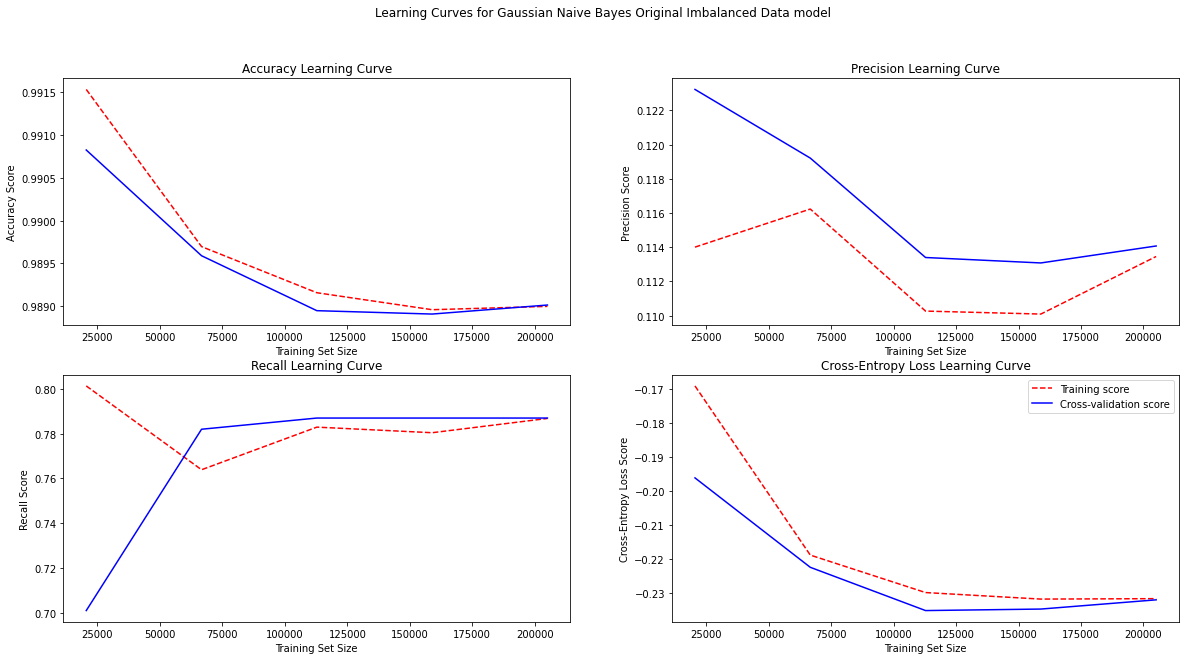

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Gaussian Naive Bayes Original Imbalanced Data", model, X_train, y_train)

In [ ]:
#we create the classification report
create_classification_report(y_pred)

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56864
  Fraudulent       0.11      0.76      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.87      0.59     56962
weighted avg       1.00      0.99      0.99     56962



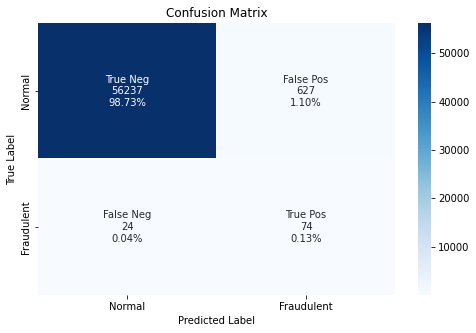

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)

The AUC: 0.872


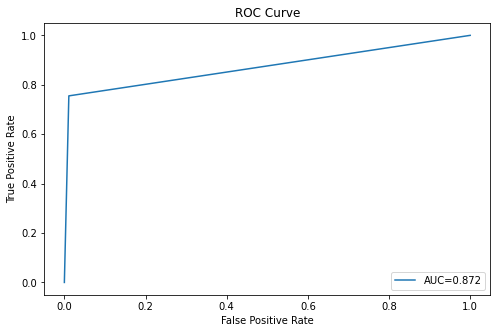

In [ ]:
NB_O_fpr, NB_O_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Oversampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
NB_model_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
NB_model_grid.fit(X_over, y_over)
print(f"The Best Estimator: {NB_model_grid.best_estimator_}")
model = NB_model_grid.best_estimator_
y_pred = model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The Best Estimator: GaussianNB(var_smoothing=2.848035868435799e-05)


**Evaluation**


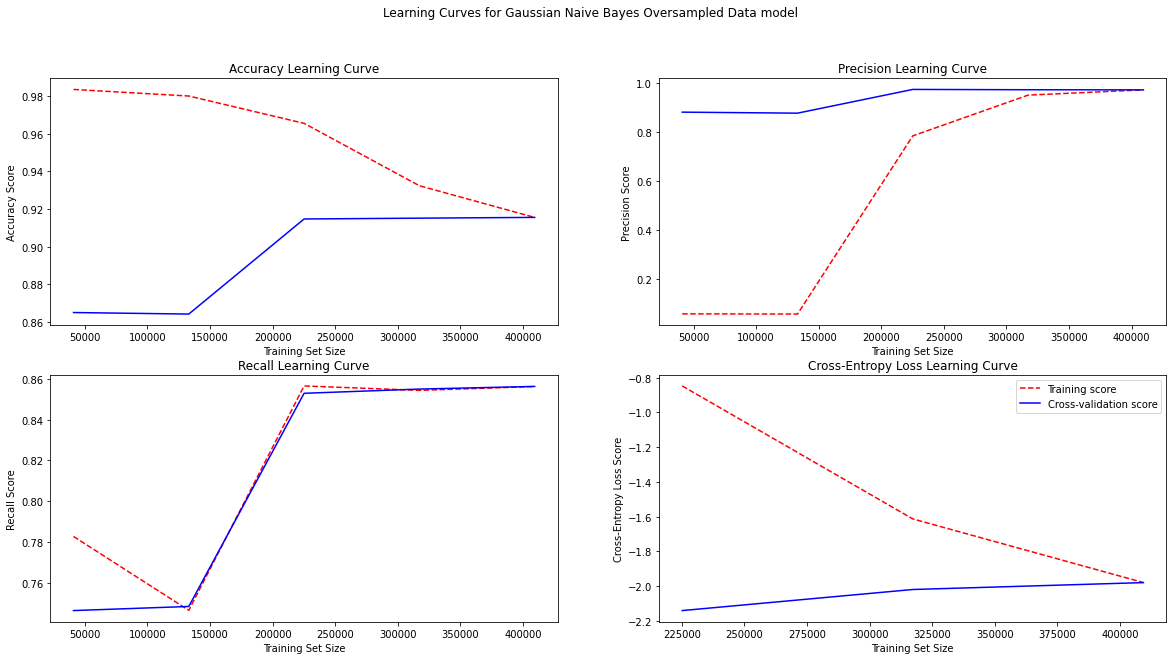

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Gaussian Naive Bayes Oversampled Data", model, X_over, y_over)

In [ ]:
#we create the classification report
create_classification_report(y_pred)

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56864
  Fraudulent       0.05      0.86      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.97      0.99     56962



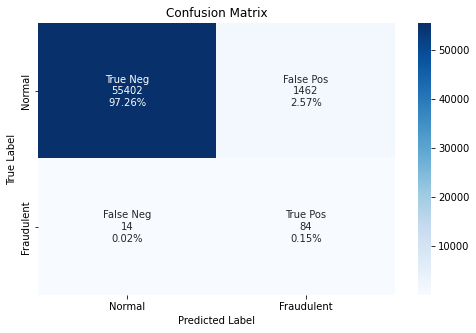

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)

The AUC: 0.916


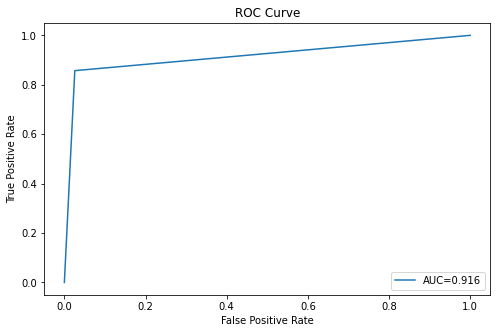

In [ ]:
NB_Ov_fpr, NB_Ov_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Undersampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
NB_model_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
NB_model_grid.fit(X_under, y_under)
print(f"The Best Estimator: {NB_model_grid.best_estimator_}")
model = NB_model_grid.best_estimator_
y_pred = model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The Best Estimator: GaussianNB(var_smoothing=0.001)


**Evaluation**


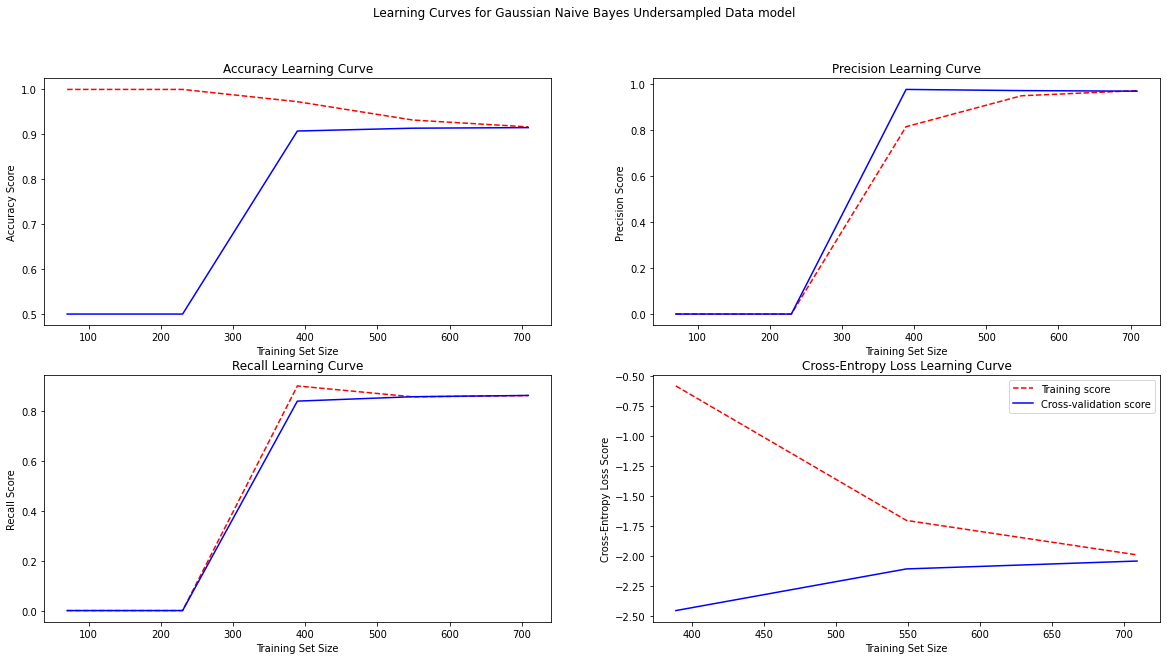

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Gaussian Naive Bayes Undersampled Data", model, X_under, y_under)

In [ ]:
#we create the classification report
create_classification_report(y_pred)

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98     56864
  Fraudulent       0.04      0.89      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



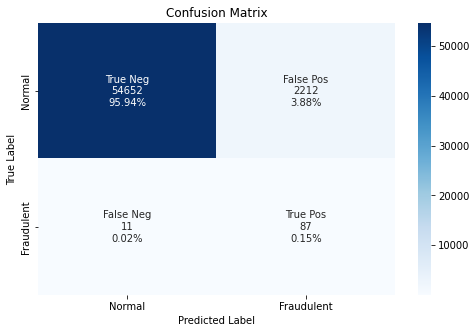

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)

The AUC: 0.924


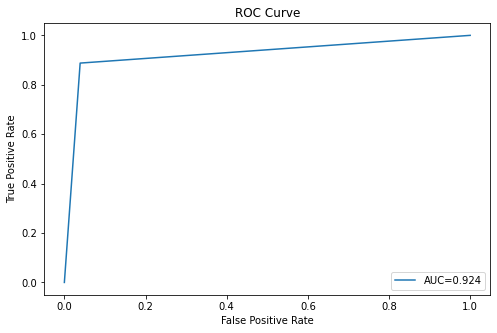

In [ ]:
NB_Un_fpr, NB_Un_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **SMOTE Data**

**Modeling**

In [ ]:
#we will do a gridsearch and find the best estimator
NB_model_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
NB_model_grid.fit(X_SMOTE_over, y_SMOTE_over)
print(f"The Best Estimator: {NB_model_grid.best_estimator_}")
model = NB_model_grid.best_estimator_
y_pred = model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The Best Estimator: GaussianNB(var_smoothing=0.0023101297000831605)


**Evaluation**


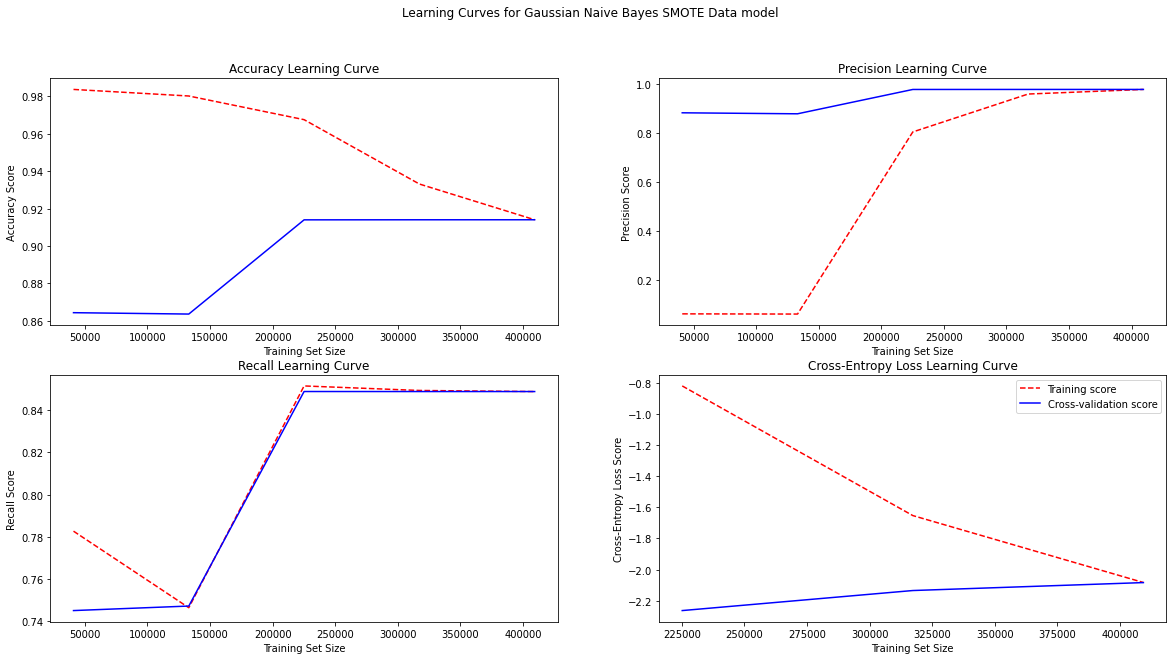

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Gaussian Naive Bayes SMOTE Data", model, X_SMOTE_over, y_SMOTE_over)

In [ ]:
#we create the classification report
create_classification_report(y_pred)

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     56864
  Fraudulent       0.07      0.86      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



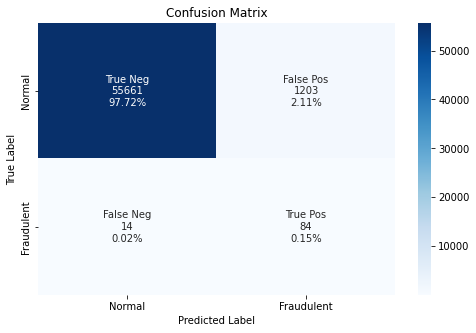

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)

The AUC: 0.918


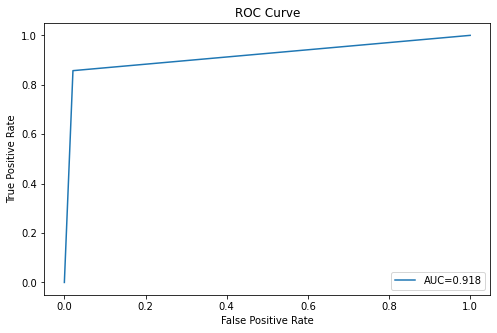

In [ ]:
NB_SMOTE_fpr, NB_SMOTE_tpr = create_ROC_curve(y_pred)

**Discussion**

##### **Logistic Regression**
Logistic Regression is a special case of linear regression where the target variable is categorical in nature, and predicts/clculates the probability of occurrence of a binary event utilizing a logit function. The dependent variable in logistic regression follows Bernoulli Distribution and Estimation is done through maximum likelihood (MLE). The dependent variable is bound between 0 and 1 since the output is a probability. A logit fuction (also know as the logistic fuction) is applied to model a binary output variable.

$Logistic Fuction = \frac{1}{1 \ + \ e^{-x}}$ <br> 
where x is the input independent variables or the features of the dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
#hyperparameter tuning, we are going to be using gridsearch for parameter: 

# * C: float, default=1.0
#     Inverse of regularization strength; must be a positive float. 

# * penalty
#     'none': no penalty is added;
#     'l2': add a L2 penalty term and it is the default choice;
#     'l1': add a L1 penalty term;
#     'elasticnet': both L1 and L2 penalty terms are added.

param_grid_lr = {"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet"]}

###### **Original Imbalanced Data**

**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
LR_model_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
LR_model_grid.fit(X_train, y_train)
print(f"The Best Estimator: {LR_model_grid.best_estimator_}")
model = LR_model_grid.best_estimator_

y_pred = model.predict(X_test)


Fitting 10 folds for each of 21 candidates, totalling 210 fits
The Best Estimator: LogisticRegression(C=10.0)


**Evaluation**


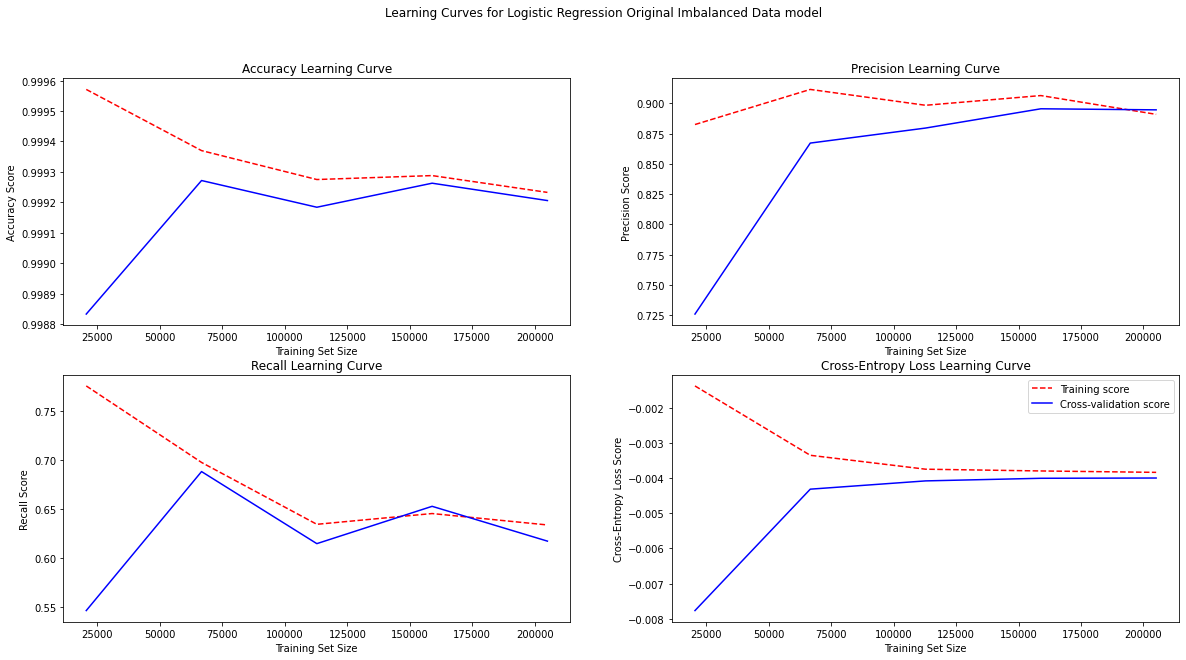

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Logistic Regression Original Imbalanced Data", model, X_train, y_train)

In [ ]:
#we create the classification report
create_classification_report(y_pred)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
  Fraudulent       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



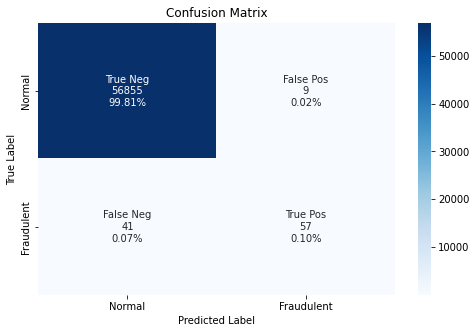

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)

The AUC: 0.791


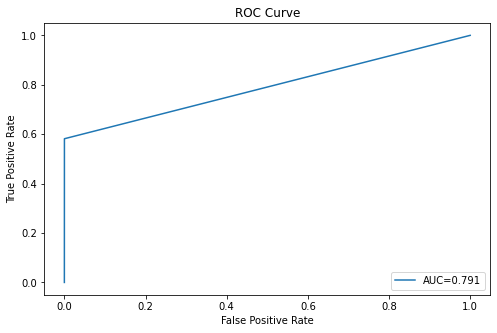

In [ ]:
LR_O_fpr, LR_O_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Oversampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
LR_model_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
LR_model_grid.fit(X_over, y_over)
print(f"The Best Estimator: {LR_model_grid.best_estimator_}")
model = LR_model_grid.best_estimator_
y_pred = model.predict(X_test)



Fitting 10 folds for each of 21 candidates, totalling 210 fits
The Best Estimator: LogisticRegression(C=0.01)


**Evaluation**


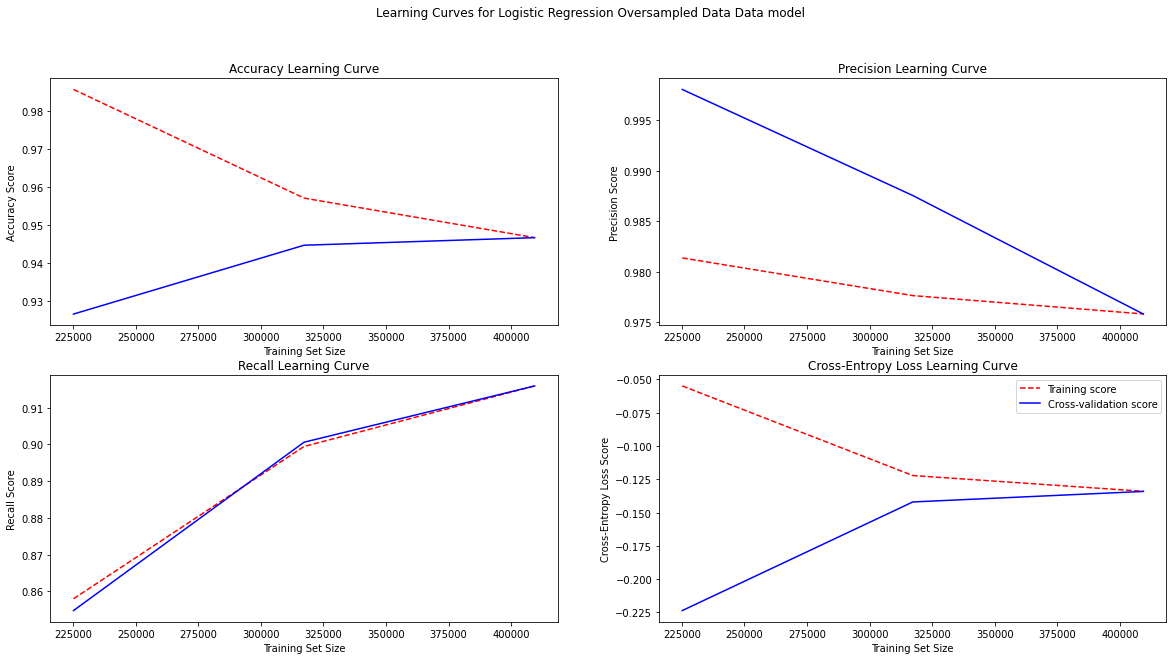

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Logistic Regression Oversampled Data Data", model, X_over, y_over)



In [ ]:
#we create the classification report
create_classification_report(y_pred)


              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     56864
  Fraudulent       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



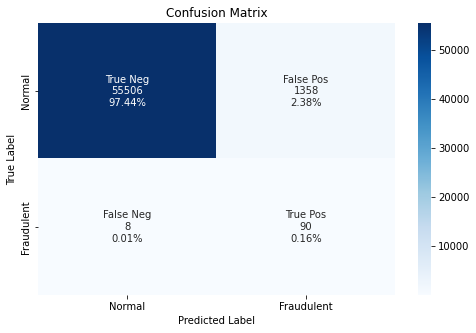

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


The AUC: 0.947


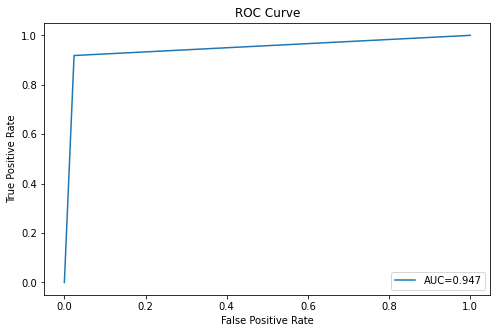

In [ ]:
LR_Ov_fpr, LR_Ov_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Undersampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
LR_model_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
LR_model_grid.fit(X_under, y_under)
print(f"The Best Estimator: {LR_model_grid.best_estimator_}")
model = LR_model_grid.best_estimator_
y_pred = model.predict(X_test)


Fitting 10 folds for each of 21 candidates, totalling 210 fits
The Best Estimator: LogisticRegression(C=0.1)


**Evaluation**


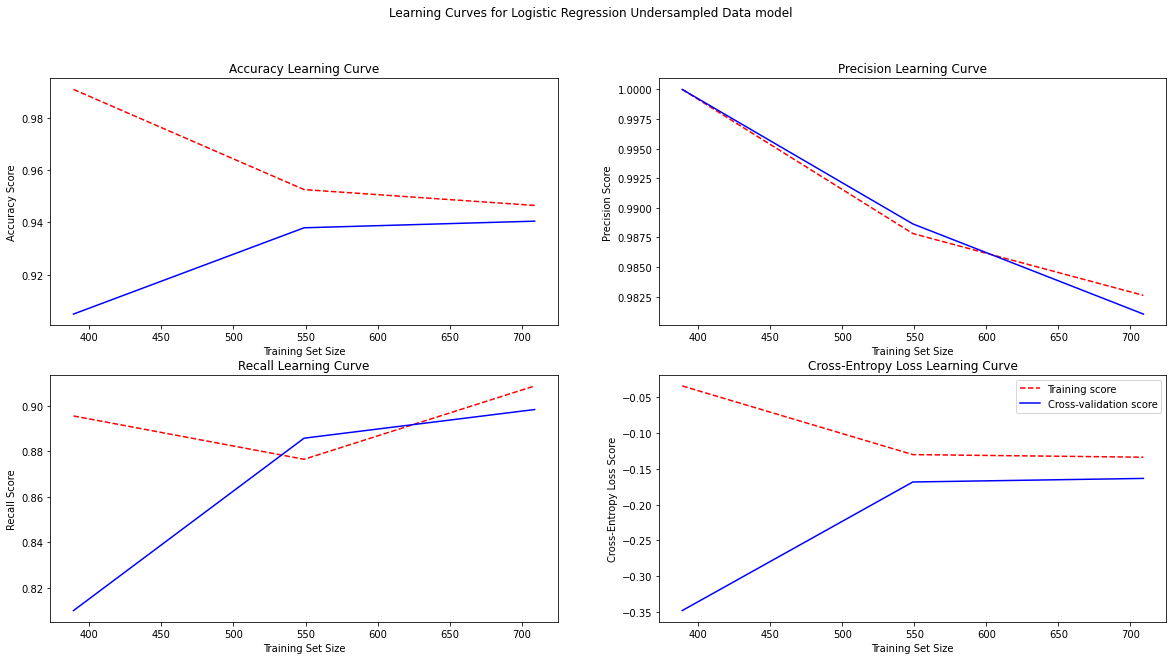

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Logistic Regression Undersampled Data", model, X_under, y_under)

In [ ]:
#we create the classification report
create_classification_report(y_pred)

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56864
  Fraudulent       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



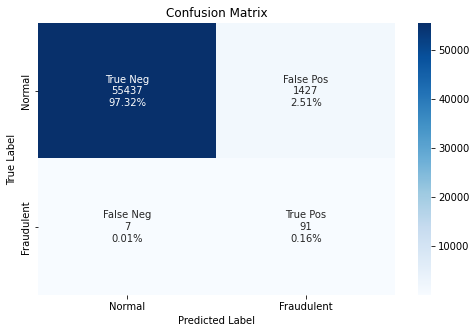

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)

The AUC: 0.952


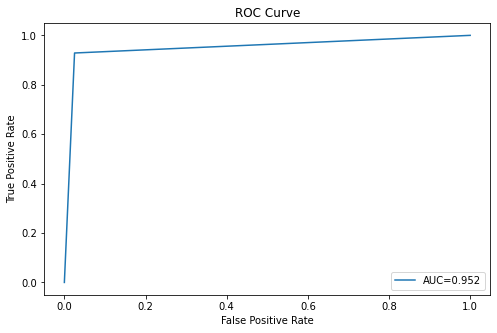

In [ ]:
LR_Un_fpr, LR_Un_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **SMOTE Data**

**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
LR_model_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
LR_model_grid.fit(X_SMOTE_over, y_SMOTE_over)
print(f"The Best Estimator: {LR_model_grid.best_estimator_}")
model = LR_model_grid.best_estimator_
y_pred = model.predict(X_test)


Fitting 10 folds for each of 21 candidates, totalling 210 fits
The Best Estimator: LogisticRegression(C=10.0)


**Evaluation**


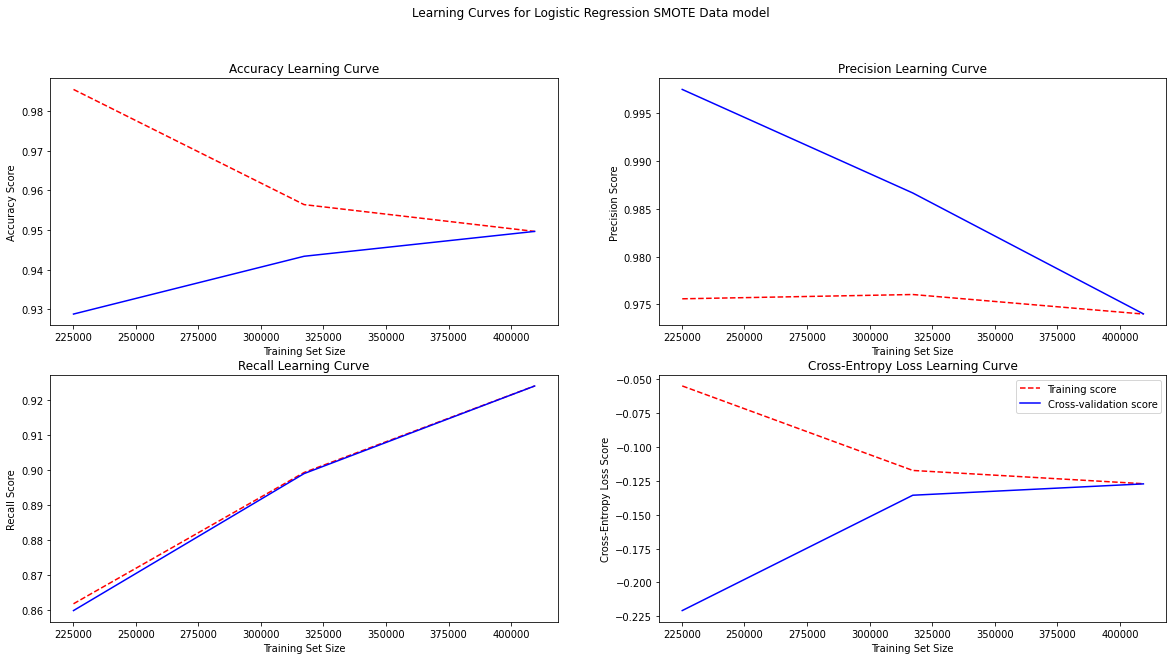

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Logistic Regression SMOTE Data", model, X_SMOTE_over, y_SMOTE_over)


In [ ]:
#we create the classification report
create_classification_report(y_pred)


              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56864
  Fraudulent       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



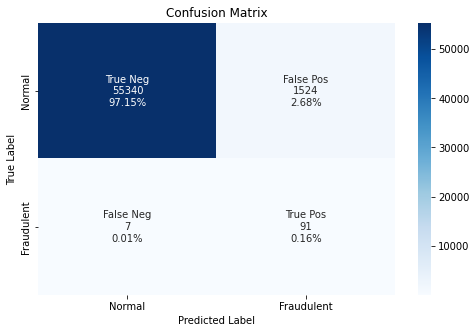

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


The AUC: 0.951


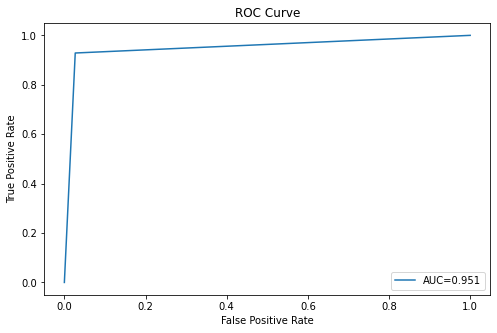

In [ ]:
LR_O_fpr, LR_O_tpr = create_ROC_curve(y_pred)

**Discussion**

##### **Decision Tree Classifier**
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. A model that predicts the target variable is created by learning simple decision rules inferred from the data features. Basically, it breaks down the dataset into smaller subsets with an increase in depth of the tree, this results in a tree with **decision nodes** and **leaf nodes**. 

**Terminology:**

1. **Root Node:**
2. **Splitting:**
3. **Decision Node:**
4. **Leaf Node:**
5. **Pruning:**
6. **Branch:**
7. **Parent and Child Node:**


Decision Tree able to handle both numerical and categorical data and the Classifier is capable of performing multi-class classification on a dataset.


**Mathematics behind Decision Tree Algorithm:**
1. **Entropy:** Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data.
>> $E(S) \ = \sum_{i=1}^{c}-p_i{log_2}p_i$
2. **Gini Impurity:** Function that determines how well a decision tree was split, it helps determine which splitter is best so that we can build a pure decision tree. Gini impurity ranges values from 0 to 0.5. Calculated by subtracting the sum of the squared probabilities of each class from one.
>> $Gini(E) \ = 1- \sum_{j=1}^{c}p_{j}^{2}$
3. **Information Gain:** The amount of information improved in the nodes before splitting them for making further decisions. Information gain tells us how important a given attribute of the feature vectors is.
>> Information Gain = entropy(parent) – [average entropy(children)]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#hyperparameter tuning, we are going to be using gridsearch for parameter: 

  # criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
  # max_depth int, default=None: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or un
param_grid_Dt = {
    'max_depth': [300, 400, 500, None],
    'criterion': ["gini", "entropy"]
}

###### **Original Imbalanced Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
DT_model_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_Dt, verbose=1, cv=5, n_jobs=-1)
DT_model_grid.fit(X_train, y_train)
print(f"The Best Estimator: {DT_model_grid.best_estimator_}")
model = DT_model_grid.best_estimator_
y_pred = model.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The Best Estimator: DecisionTreeClassifier(criterion='entropy')


**Evaluation**


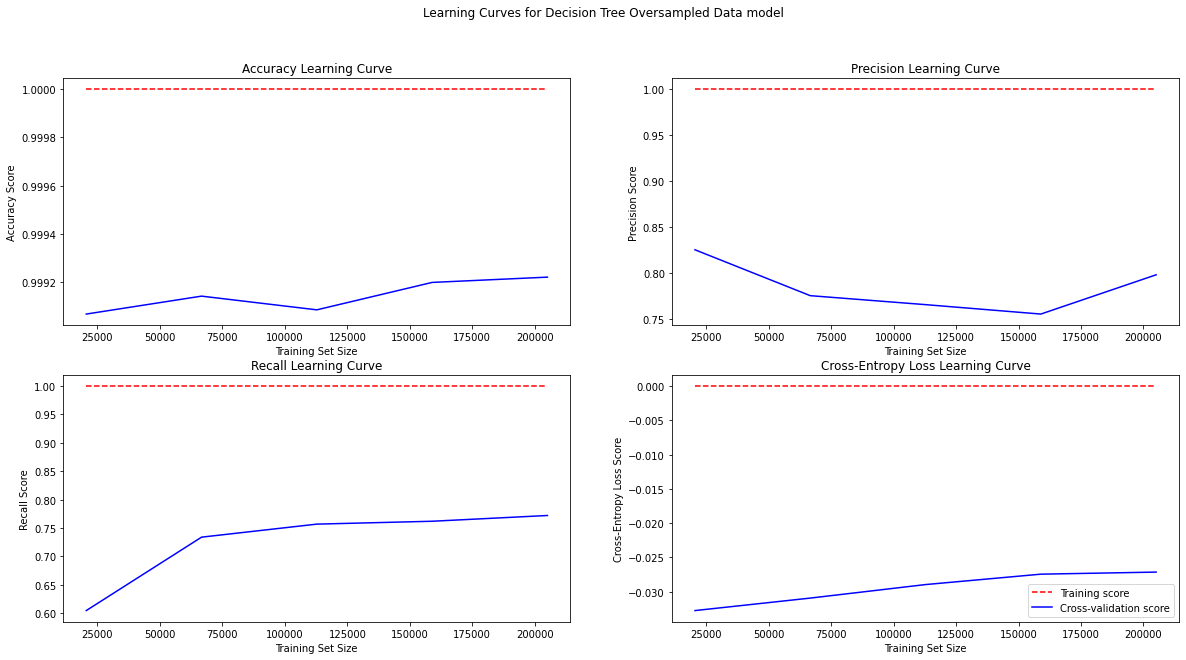

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Decision Tree Oversampled Data", model, X_train, y_train)

In [ ]:
#we create the classification report
create_classification_report(y_pred)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
  Fraudulent       0.76      0.81      0.78        98

    accuracy                           1.00     56962
   macro avg       0.88      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



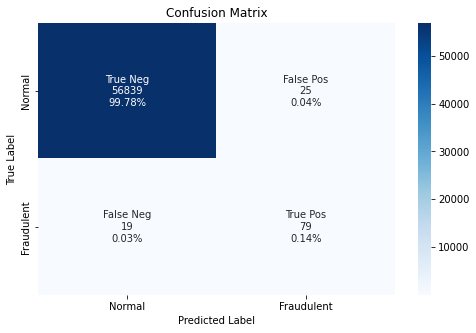

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)

The AUC: 0.903


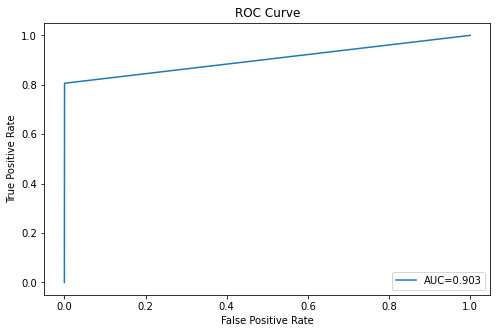

In [ ]:
DT_O_fpr, DT_O_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Oversampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
DT_model_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_Dt, verbose=1, cv=5, n_jobs=-1)
DT_model_grid.fit(X_over, y_over)
print(f"The Best Estimator: {DT_model_grid.best_estimator_}")
model = DT_model_grid.best_estimator_
y_pred = model.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
The Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=500)


**Evaluation**


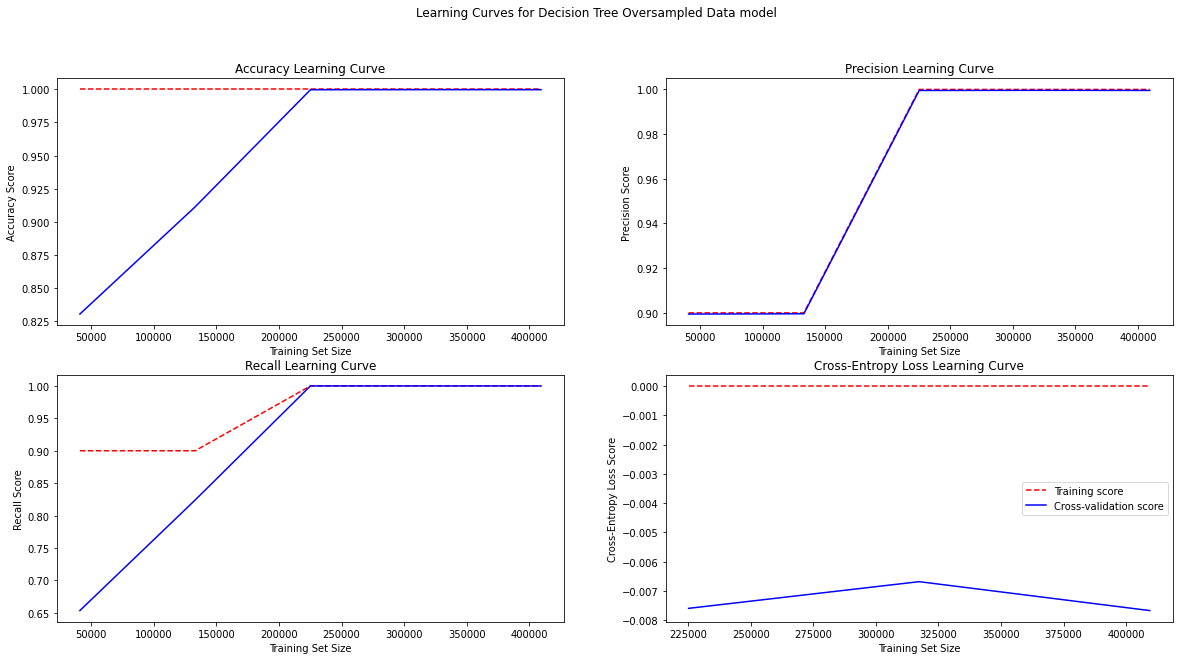

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Decision Tree Oversampled Data", model, X_over, y_over)


In [ ]:
#we create the classification report
create_classification_report(y_pred)


              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
  Fraudulent       0.71      0.66      0.69        98

    accuracy                           1.00     56962
   macro avg       0.86      0.83      0.84     56962
weighted avg       1.00      1.00      1.00     56962



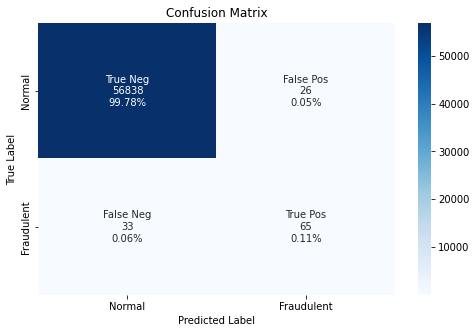

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


The AUC: 0.831


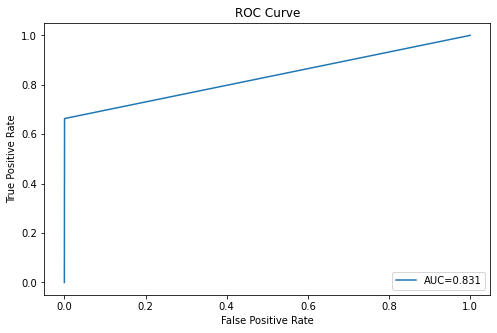

In [ ]:
DT_Ov_fpr, DT_Ov_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Undersampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
DT_model_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_Dt, verbose=1, cv=5, n_jobs=-1)
DT_model_grid.fit(X_under, y_under)
print(f"The Best Estimator: {DT_model_grid.best_estimator_}")
model = DT_model_grid.best_estimator_
y_pred = model.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
The Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=400)


**Evaluation**


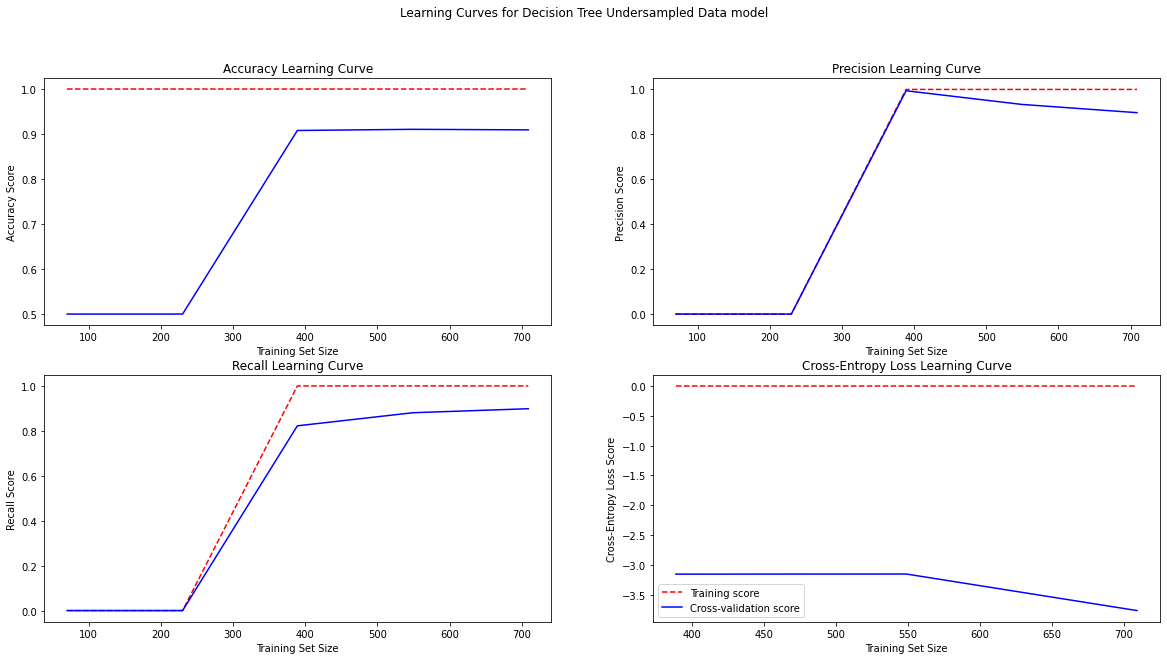

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Decision Tree Undersampled Data", model, X_under, y_under)

In [ ]:
#we create the classification report
create_classification_report(y_pred)


              precision    recall  f1-score   support

      Normal       1.00      0.89      0.94     56864
  Fraudulent       0.01      0.90      0.03        98

    accuracy                           0.89     56962
   macro avg       0.51      0.89      0.48     56962
weighted avg       1.00      0.89      0.94     56962



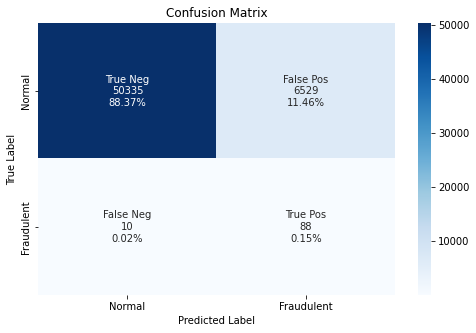

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


The AUC: 0.892


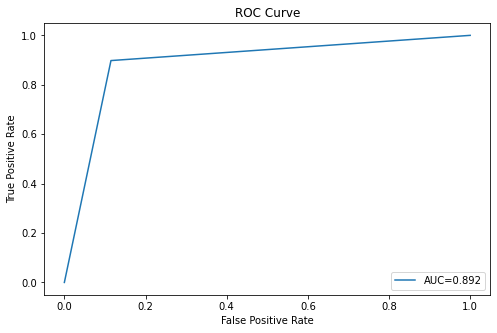

In [ ]:
DT_Un_fpr, DT_Un_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **SMOTE Data**

**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
DT_model_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_Dt, verbose=1, cv=5, n_jobs=-1)
DT_model_grid.fit(X_SMOTE_over, y_SMOTE_over)
print(f"The Best Estimator: {DT_model_grid.best_estimator_}")
model = DT_model_grid.best_estimator_
y_pred = model.predict(X_test)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
The Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=500)


**Evaluation**


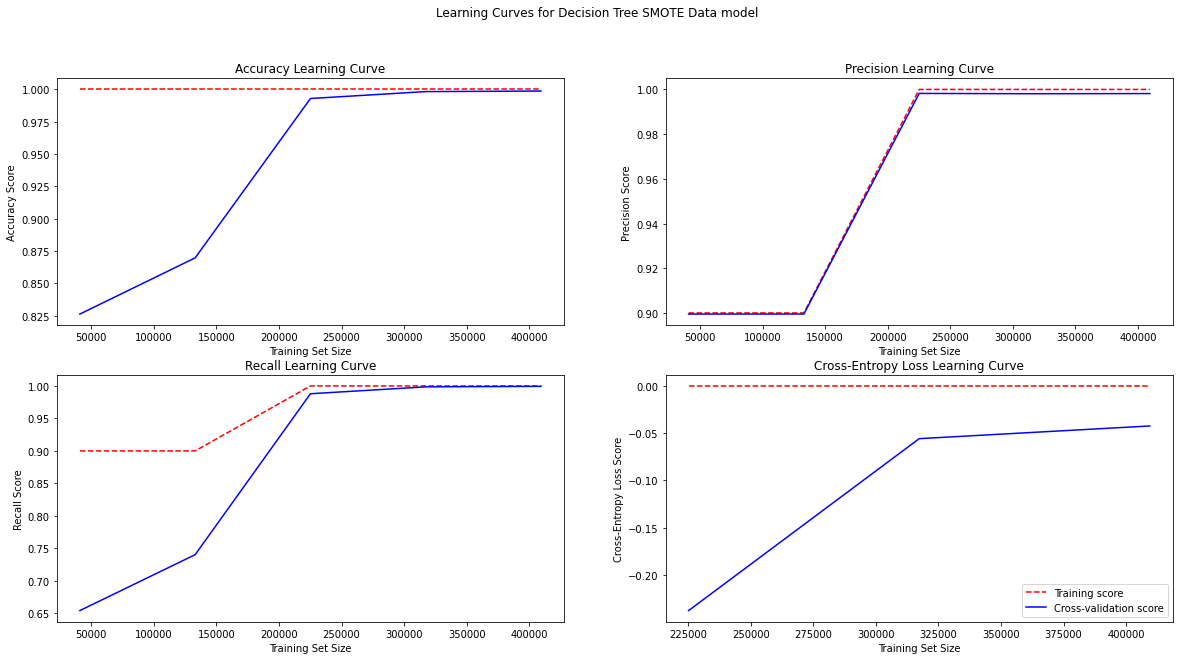

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Decision Tree SMOTE Data", model, X_SMOTE_over, y_SMOTE_over)



In [ ]:
#we create the classification report
create_classification_report(y_pred)


              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
  Fraudulent       0.45      0.77      0.57        98

    accuracy                           1.00     56962
   macro avg       0.72      0.88      0.78     56962
weighted avg       1.00      1.00      1.00     56962



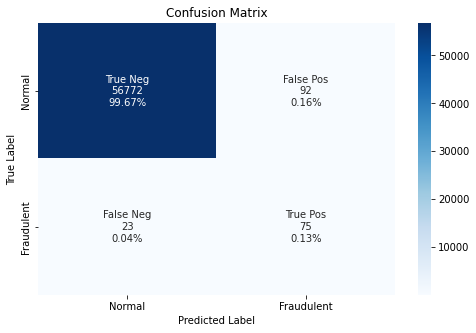

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)



The AUC: 0.882


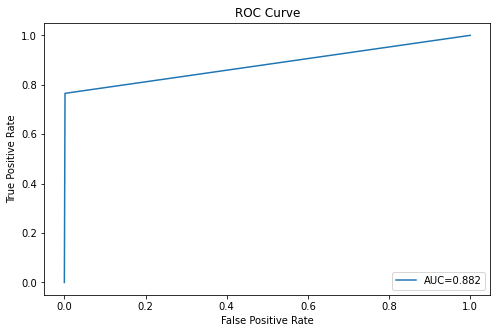

In [ ]:
DT_SMOTE_fpr, DT_SMOTE_tpr = create_ROC_curve(y_pred)

**Discussion**

##### **Support Vector Machines Classifier**


In [ ]:
from sklearn.svm import SVC  
#hyperparameter tuning, we are going to be using gridsearch for parameter: 

# C:  float, default=1.0
#   Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

# kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples)

# gamma: {‘scale’, ‘auto’} or float, default=’scale’ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#   if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
#   if ‘auto’, uses 1 / n_features.


param_grid_svc = {
    'C': [1, 10, 100], 
    'gamma': ['auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
    
}

###### **Original Imbalanced Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
SVC_model_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc, verbose=1, cv=3, n_jobs=-1)
SVC_model_grid.fit(X_train, y_train)
print(f"The Best Estimator: {SVC_model_grid.best_estimator_}")
model = SVC_model_grid.best_estimator_
y_pred = model.predict(X_test)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
The Best Estimator: SVC(C=10, gamma=0.01, kernel='poly')


**Evaluation**


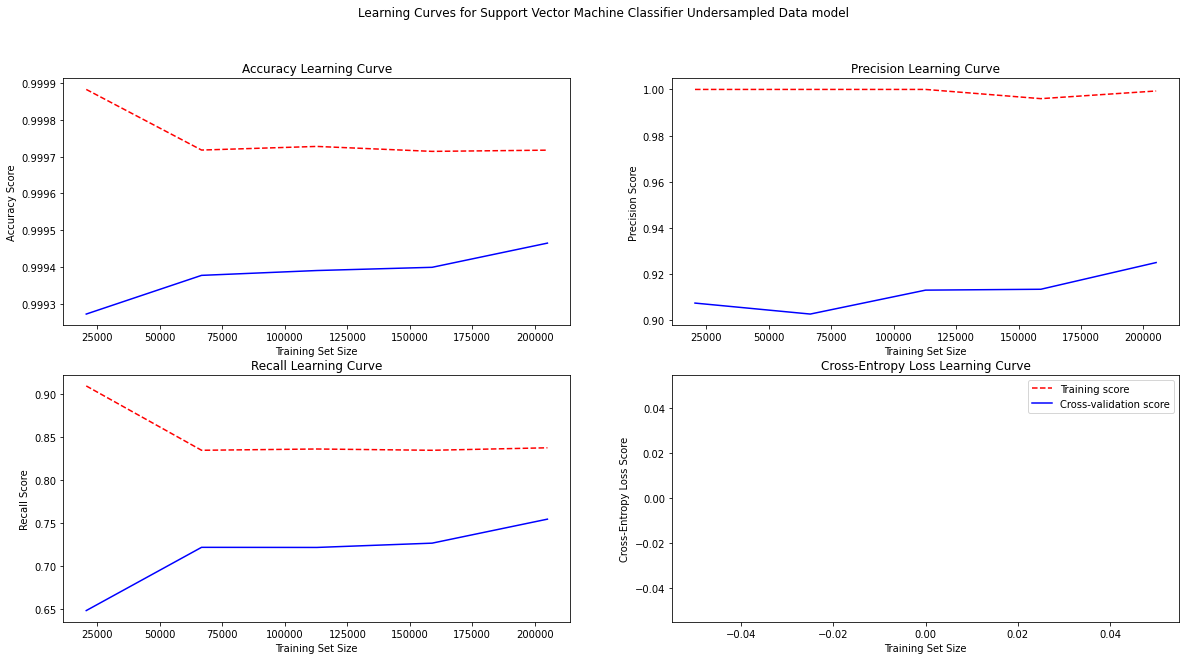

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Support Vector Machine Classifier Undersampled Data", model, X_train, y_train)



In [ ]:
#we create the classification report
create_classification_report(y_pred)



              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
  Fraudulent       0.93      0.68      0.79        98

    accuracy                           1.00     56962
   macro avg       0.97      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



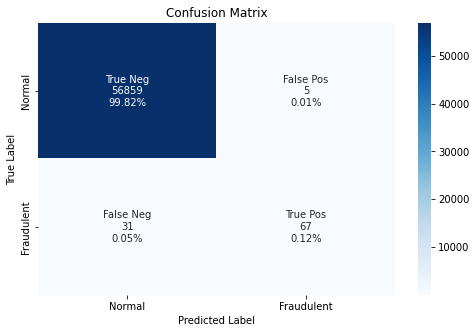

In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)



The AUC: 0.842


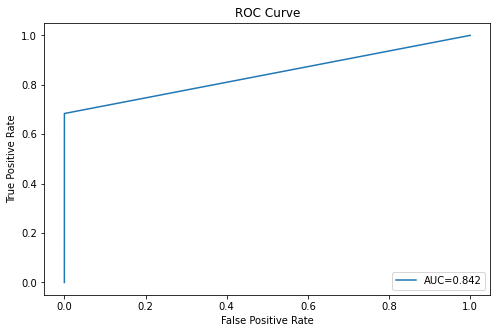

In [ ]:
SVC_O_fpr, SVC_O_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Oversampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
SVC_model_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc, verbose=1, cv=3, n_jobs=-1)
SVC_model_grid.fit(X_over, y_over)
print(f"The Best Estimator: {SVC_model_grid.best_estimator_}")
model = SVC_model_grid.best_estimator_
y_pred = model.predict(X_test)



Fitting 3 folds for each of 27 candidates, totalling 81 fits


**Evaluation**


In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Support Vector Machine Classifier Undersampled Data", model, X_over, y_over)



In [ ]:
#we create the classification report
create_classification_report(y_pred)



In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)



In [ ]:
SVC_Ov_fpr, SVC_Ov_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Undersampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
SVC_model_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc, verbose=1, cv=3, n_jobs=-1)
SVC_model_grid.fit(X_under, y_under)
print(f"The Best Estimator: {SVC_model_grid.best_estimator_}")
model = SVC_model_grid.best_estimator_
y_pred = model.predict(X_test)



**Evaluation**


In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Support Vector Machine Classifier Undersampled Data", model, X_under, y_under)



In [ ]:
#we create the classification report
create_classification_report(y_pred)



In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)



In [ ]:
SVC_Un_fpr, SVC_Un_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **SMOTE Data**

**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
SVC_model_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc, verbose=1, cv=3, n_jobs=-1)
SVC_model_grid.fit(X_SMOTE_over, y_SMOTE_over)
print(f"The Best Estimator: {SVC_model_grid.best_estimator_}")
model = SVC_model_grid.best_estimator_
y_pred = model.predict(X_test)



**Evaluation**


In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("Support Vector Machine Classifier Undersampled Data", model, X_SMOTE_over, y_SMOTE_over)



In [ ]:
#we create the classification report
create_classification_report(y_pred)



In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)



In [ ]:
SVC_SMOTE_fpr, SVC_SMOTE_tpr = create_ROC_curve(y_pred)

**Discussion**

##### **K-Nearest Neighbour Classifier**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#hyperparameter tuning, we are going to be using gridsearch for parameter: 

# n_neighbors: int, default=5
#   Number of neighbors to use by default for kneighbors queries.

# weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
#   Weight function used in prediction. Possible values:
#   * ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#   * ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# metric: str or callable, default=’minkowski’
#     Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2. See the documentation of scipy.spatial.distance and the metrics listed in distance_metrics for valid metric values.


param_grid_knn = {
    'n_neighbors': [10,25,50,75],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'chebyshev']
}



###### **Original Imbalanced Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
KNN_model_grid = GridSearchCV(estimator=KNeighborsClassifier(algorithm='auto'), param_grid=param_grid_knn, verbose=1, cv=3, n_jobs=-1)
KNN_model_grid.fit(X_train, y_train)
print(f"The Best Estimator: {KNN_model_grid.best_estimator_}")
model = KNN_model_grid.best_estimator_
y_pred = model.predict(X_test)



**Evaluation**


In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("K-Nearest Neighbors Classifier Undersampled Data", model, X_train, y_train)



In [ ]:
#we create the classification report
create_classification_report(y_pred)



In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


In [ ]:
KNN_O_fpr, KNN_O_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Oversampled Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
KNN_model_grid = GridSearchCV(estimator=KNeighborsClassifier(algorithm='auto'), param_grid=param_grid_knn, verbose=1, cv=3, n_jobs=-1)
KNN_model_grid.fit(X_over, y_over)
print(f"The Best Estimator: {KNN_model_grid.best_estimator_}")
model = KNN_model_grid.best_estimator_
y_pred = model.predict(X_test)



**Evaluation**


In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("K-Nearest Neighbors Classifier Undersampled Data", model, X_over, y_over)


In [ ]:
#we create the classification report
create_classification_report(y_pred)


In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


In [ ]:
KNN_Ov_fpr, KNN_Ov_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **Undersampled Data**


**Modeling**

In [ ]:
#we will do a gridsearch and find the best estimator
KNN_model_grid = GridSearchCV(estimator=KNeighborsClassifier(algorithm='auto'), param_grid=param_grid_knn, verbose=1, cv=3, n_jobs=-1)
KNN_model_grid.fit(X_under, y_under)
print(f"The Best Estimator: {KNN_model_grid.best_estimator_}")
model = KNN_model_grid.best_estimator_
y_pred = model.predict(X_test)


**Evaluation**

In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("K-Nearest Neighbors Classifier Undersampled Data", model, X_under, y_under)


In [ ]:
#we create the classification report
create_classification_report(y_pred)


In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


In [ ]:
KNN_Un_fpr, KNN_Un_tpr = create_ROC_curve(y_pred)

**Discussion**

###### **SMOTE Data**


**Modeling**


In [ ]:
#we will do a gridsearch and find the best estimator
KNN_model_grid = GridSearchCV(estimator=KNeighborsClassifier(algorithm='auto'), param_grid=param_grid_knn, verbose=1, cv=3, n_jobs=-1)
KNN_model_grid.fit(X_SMOTE_over, y_SMOTE_over)
print(f"The Best Estimator: {KNN_model_grid.best_estimator_}")
model = KNN_model_grid.best_estimator_
y_pred = model.predict(X_test)



**Evaluation**


In [ ]:
#we will plot the learning curves for our model.
plot_learning_curves("K-Nearest Neighbors Classifier SMOTE Data", model, X_SMOTE_over, y_SMOTE_over)


In [ ]:
#we create the classification report
create_classification_report(y_pred)


In [ ]:
#we create the confusion matrix
create_confusion_matrix(y_pred)


In [ ]:
KNN_SMOTE_fpr, KNN_SMOTE_tpr = create_ROC_curve(y_pred)

**Discussion**

##### **One-class Support Vector Machine**


In [ ]:
from sklearn.svm import OneClassSVM
#hyperparameter tuning, we are going to be using gridsearch for parameter: 

# kernel: {‘poly’, ‘rbf’, ‘sigmoid’} or callable, default=’rbf’
#     Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

# gamma{‘auto’} or float, default=’scale’
#   Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#     if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
#     if ‘auto’, uses 1 / n_features.

# nu: float, default=0.5
#     An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken.

param_grid_svc = {
    'kernel' : ['rbf','poly','sigmoid'], 
    'gamma' : ['auto',0.001, 0.01, 0.1, 1], 
    'nu': [0.001, 0.01, 0.1, 1]
}

##### **DBSCAN**


##### **Isolations Forest**


##### **LOF**

Deep Learning:



##### **Autoencoder**


##### **Variational Autoencoders**


##### **Generative Adversarial Networks**

##### **Sequence-to-Sequence Models**

### **Conclusion**

### **References**
> https://en.wikipedia.org/wiki/Autoencoder <br>
> https://towardsdatascience.com/statistical-techniques-for-anomaly-detection-6ac89e32d17a <br>
> https://en.wikipedia.org/wiki/Anomaly_detection <br>
>https://memgraph.com/blog/how-to-develop-a-credit-card-fraud-detection-application-using-memgraph-flask-and-d3js <br>
> https://ff12.fastforwardlabs.com<br>
> https://iq.opengenus.org/types-of-autoencoder/ <br>
> https://scikit-learn.org/stable/modules/outlier_detection.html
> http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/ <br>
> https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/ <br>
> https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18 <br>
> https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00390-x <br>
> https://www.xenonstack.com/insights/anomaly-detection-deep-learning/ <br>
> https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/<br>
> https://developers.google.com/machine-learning/glossary <br>
> https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea <br>